<a href="https://colab.research.google.com/github/OctavioGMoran/Proyecto_MNA_Equipo1/blob/main/Avance2_1Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_ _ _
### **Equipo 1**

**Diana Valeria García Briones - A01793006**

**Octavio Alberto García Morán - A01213977**

**Ivan Lee Cancino - A01793491**


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, skew, norm
from scipy import stats
from sklearn.metrics import silhouette_score

In [58]:
# Cargando los datos
file_path = 'BD_Final.xlsx'
data = pd.read_excel(file_path)

**Información general de las variables y primeras columnas**

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           351 non-null    int64
 1   CI           351 non-null    int64
 2   Edad         351 non-null    int64
 3   Año          351 non-null    int64
 4   Línea        351 non-null    int64
 5   MA           351 non-null    int64
 6   SON          351 non-null    int64
 7   ES           351 non-null    int64
 8   PD           351 non-null    int64
 9   CRI          351 non-null    int64
 10  VR           351 non-null    int64
 11  TR           351 non-null    int64
 12  EF           351 non-null    int64
 13  ECA          351 non-null    int64
 14  HD           351 non-null    int64
 15  HP           351 non-null    int64
 16  EC           351 non-null    int64
 17  PC           351 non-null    int64
 18  GM           351 non-null    int64
 19  MM           351 non-null    int64
 20  PA        

,ID,CI,Edad,Año,Línea,MA,SON,ES,PD,CRI,...,TBM,IEI,MPC,AHG,TMM,MDO,DIG,DVS,RBF,TOTAL BECK
0,1,1,21,5,2,1,0,0,0,1,...,0,0,0,0,2,0,0,0,0,10
1,2,1,25,5,2,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,10
2,3,1,19,1,1,3,4,4,4,4,...,1,3,0,1,1,2,3,1,2,41
3,4,1,18,1,1,2,2,2,2,1,...,0,0,1,1,2,0,0,0,0,9
4,5,1,19,2,1,1,0,2,2,1,...,3,2,1,0,0,0,2,0,0,26


**A. Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:**

Al momento, no se identifica necesario realizar alguna transformación para la base de datos, ya que viene codificada de origen, los puntos que se muestran en la entrega son los siguientes:


1.   Generación de nuevas características: no se pueden generar nuevas características ya que los indicadores son reconocidos por toda la comunidad médica y alterarlos podría generar baja aceptación entre los profesionales de la salud
2.   Discretización o binning: de origen, todas las variables ya vienen codificadas y transformadas para su explotación.
3. Codificación: de origen, todas las variables ya vienen codificadas y transformadas para su explotación.
4. Escalamiento: el escalamiento se realizará en la siguiente sección para realizar el análisis de clusters.
5. Transformación: se realizará una transformación logarítmica para poder modelar elasticidades (%) al intentar explicar la relación que existe entre las variables y el estudio en línea.

A continuación, se muestra el análisis para poder llegar a los clusters y para definir las variables relevantes.

> **Exploración de todos los datos, distribución y QQ**


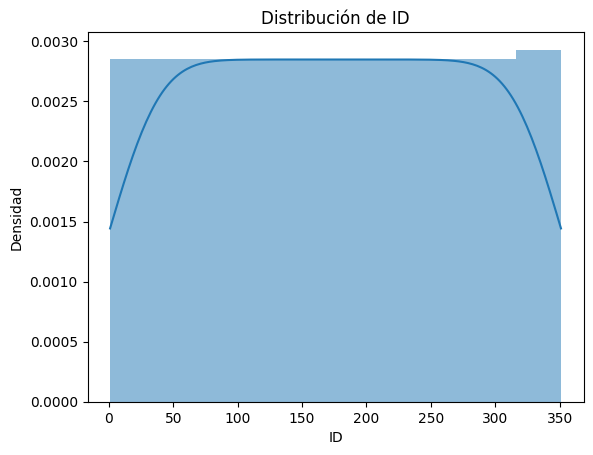

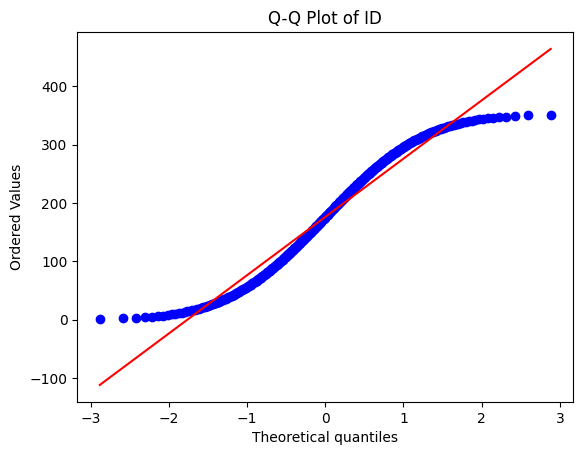

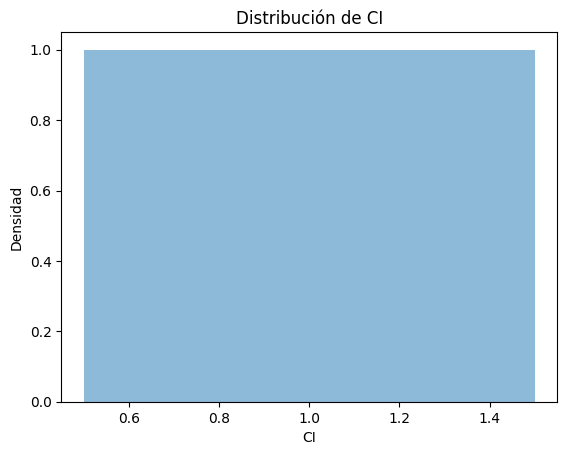

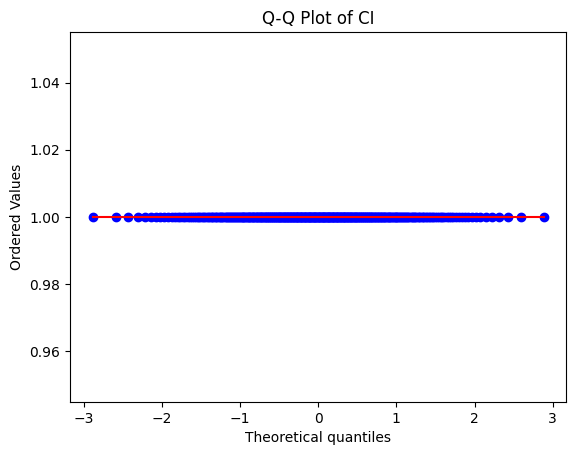

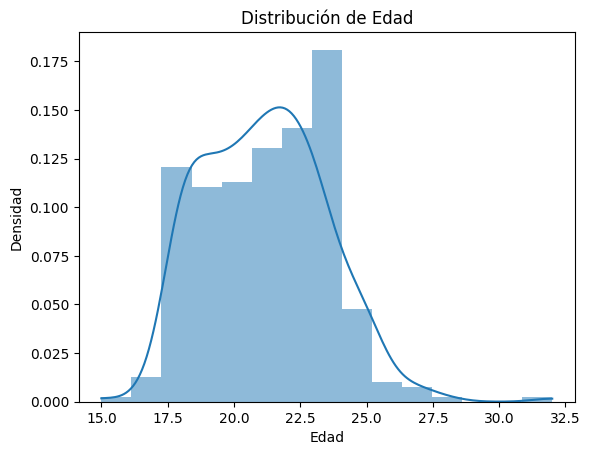

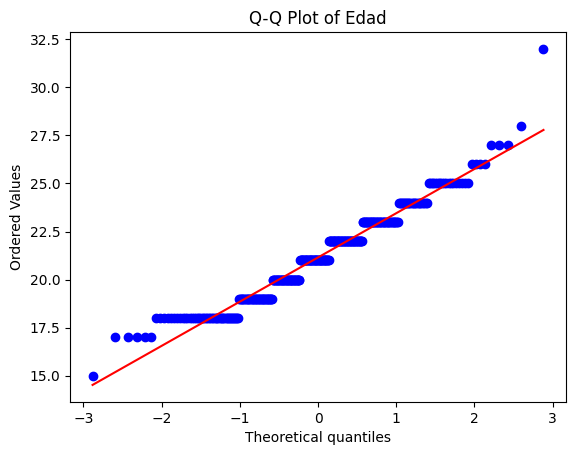

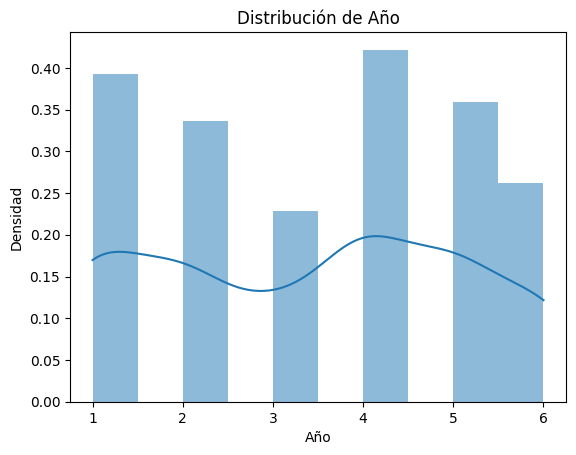

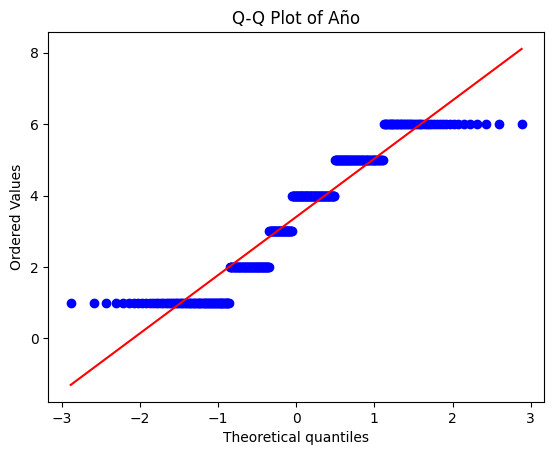

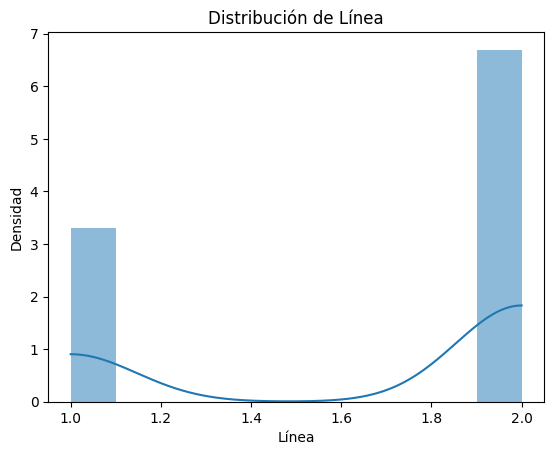

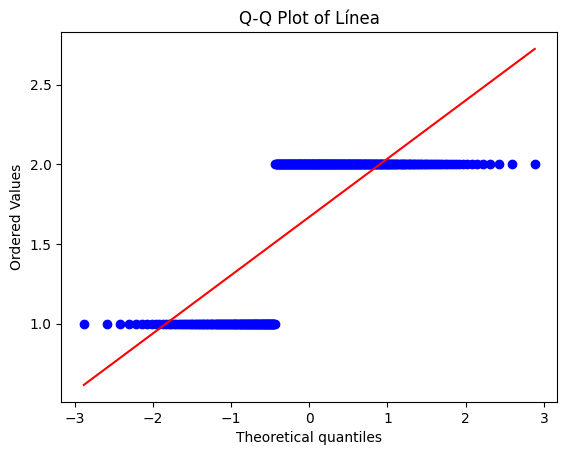

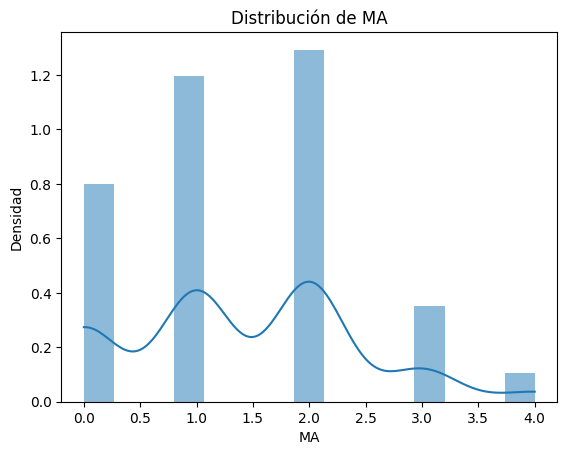

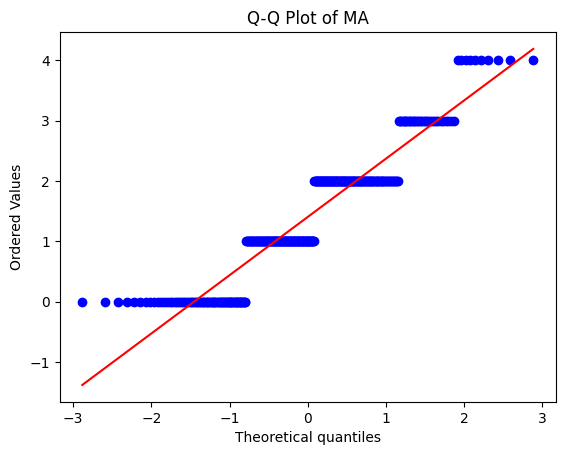

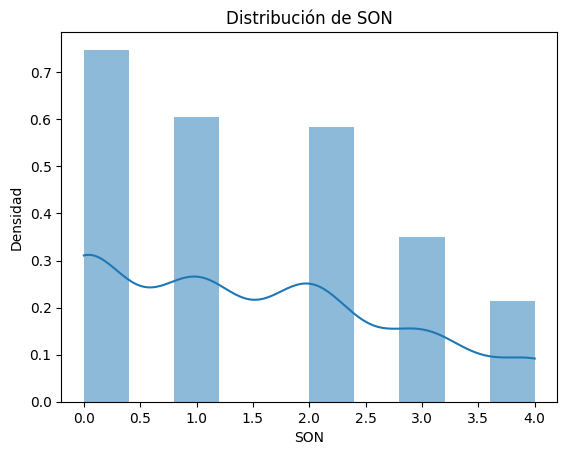

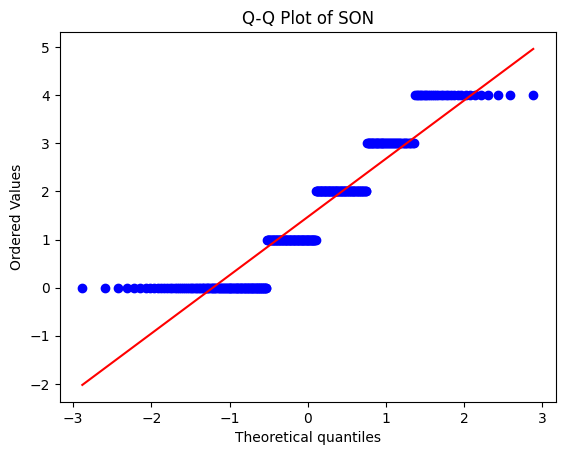

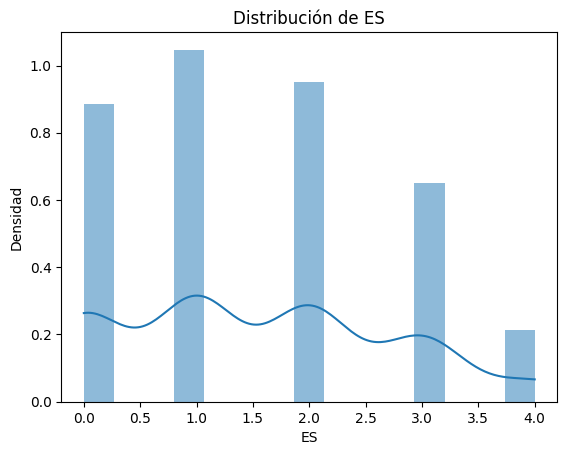

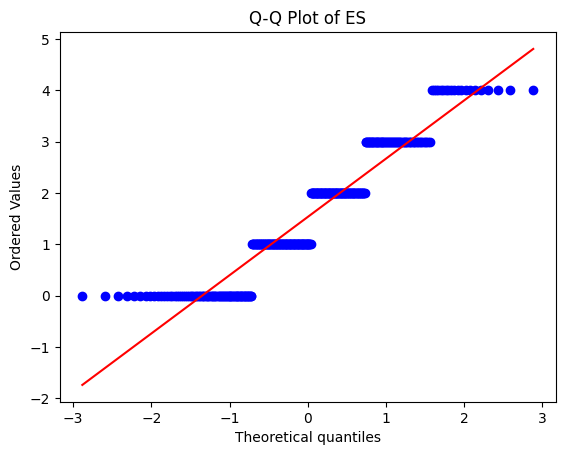

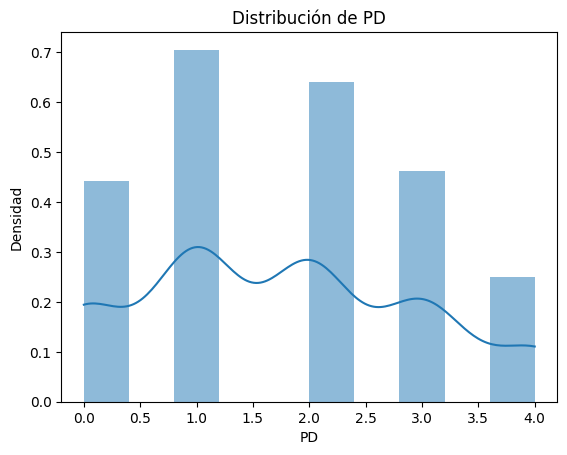

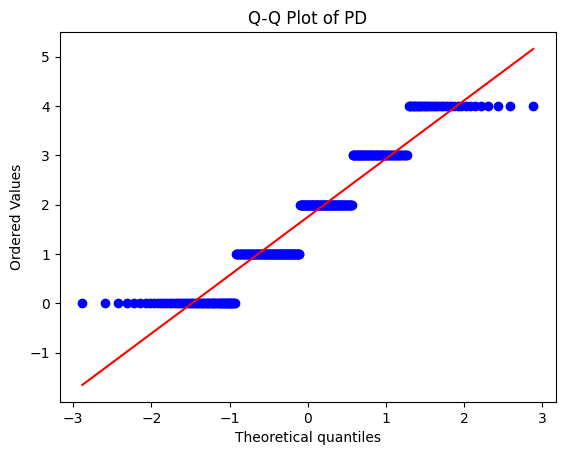

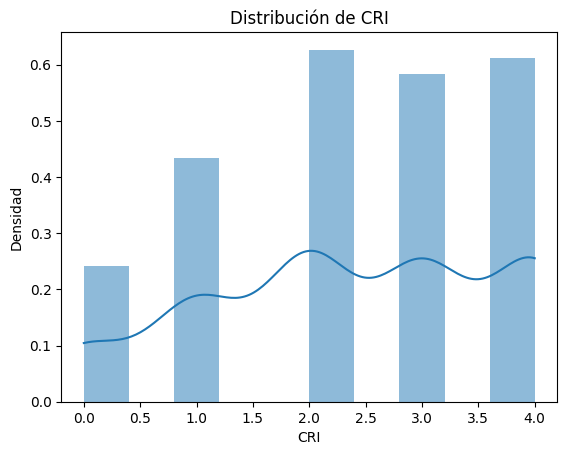

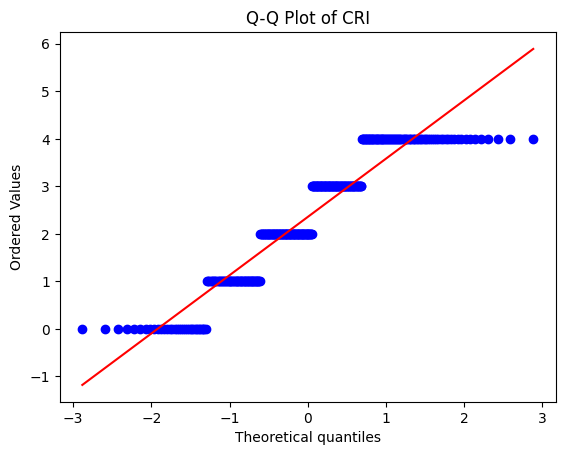

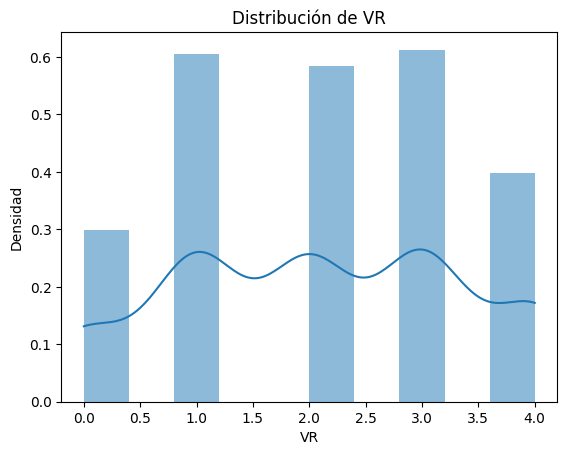

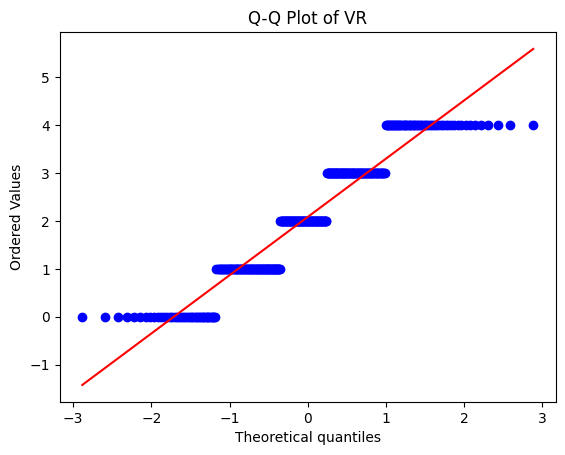

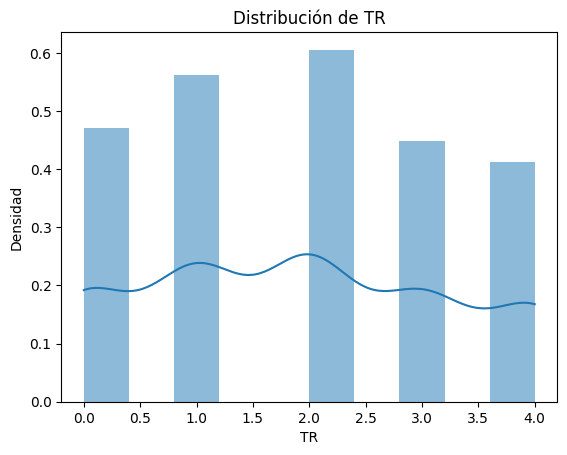

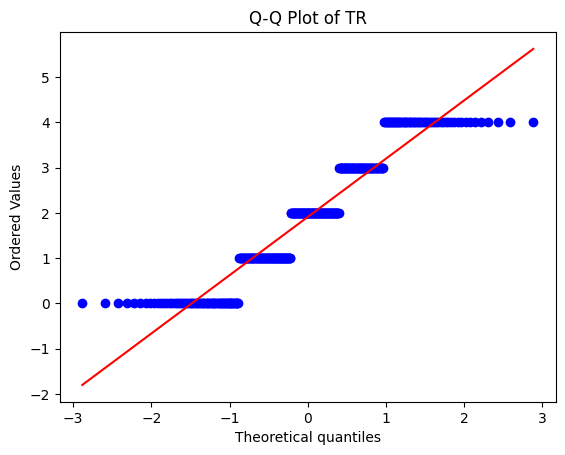

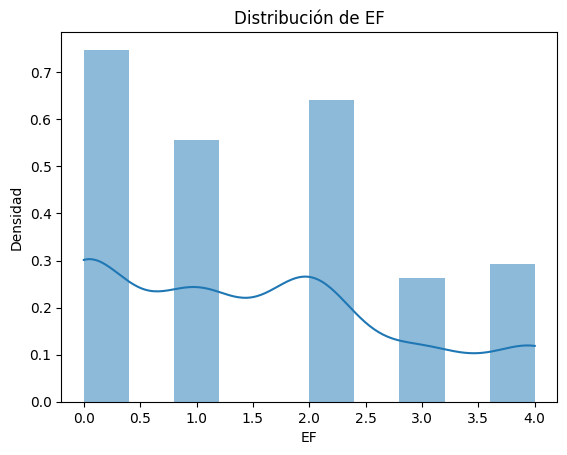

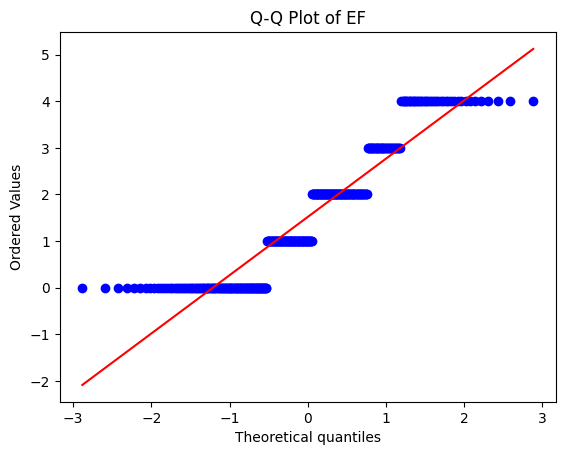

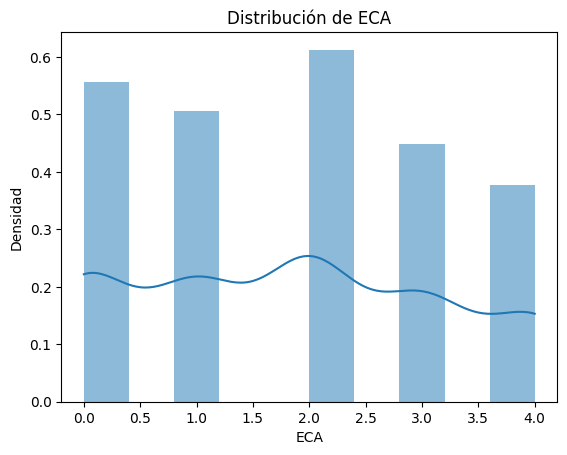

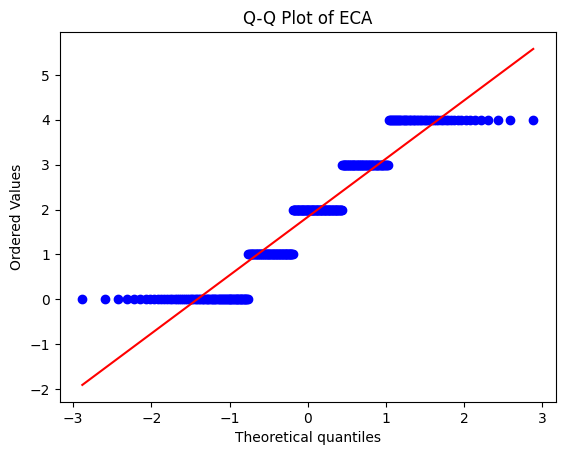

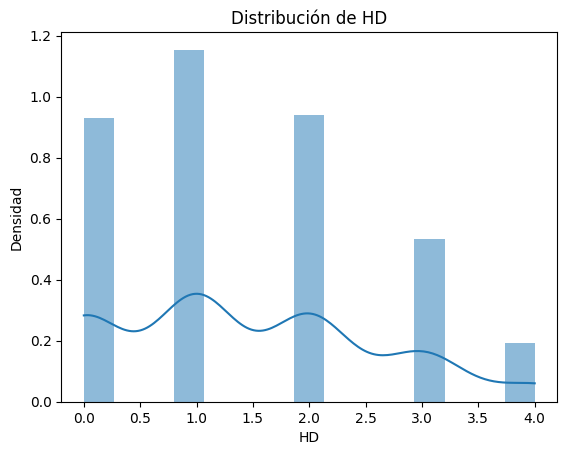

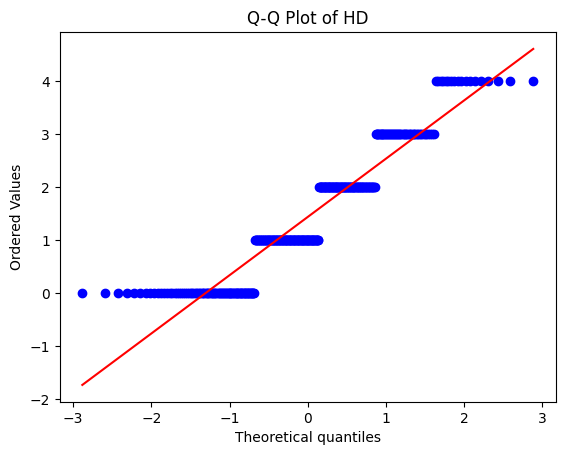

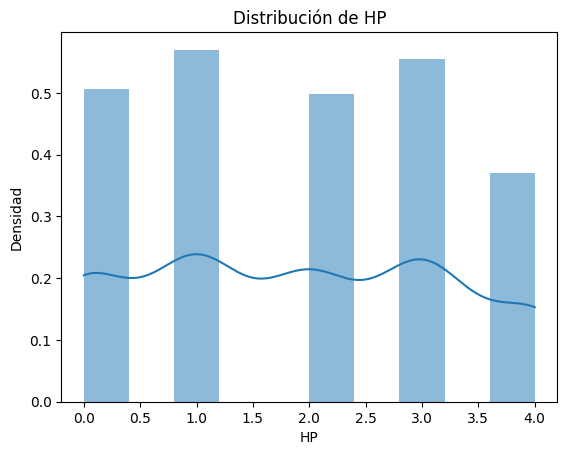

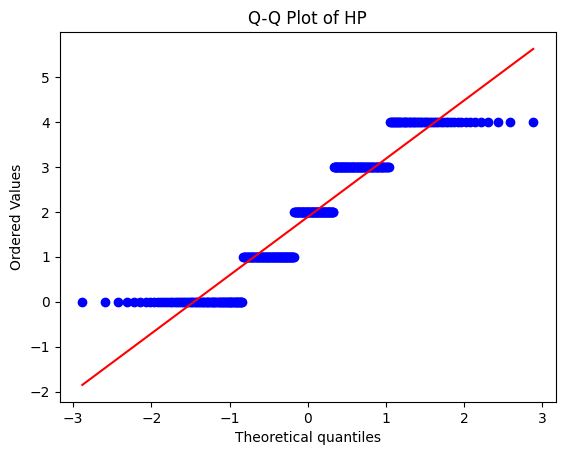

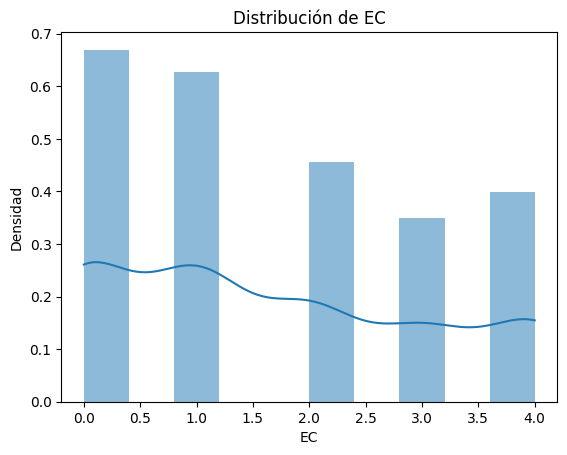

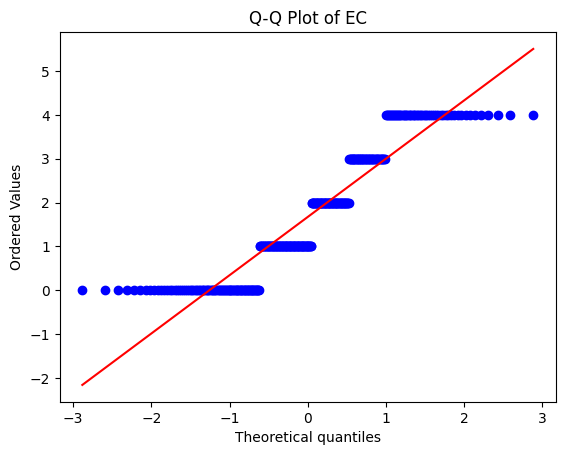

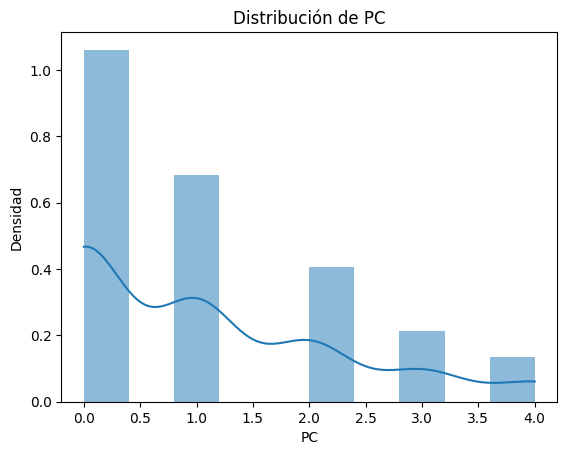

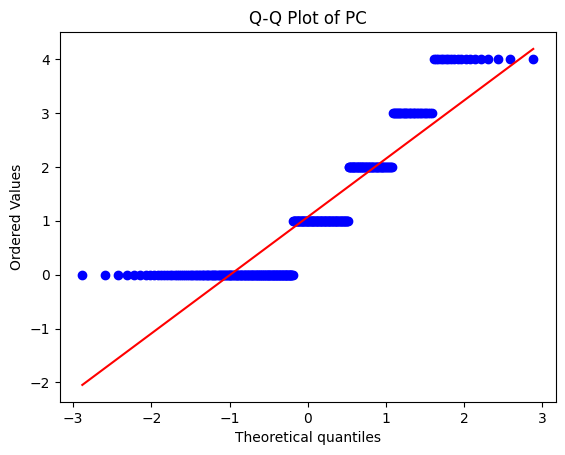

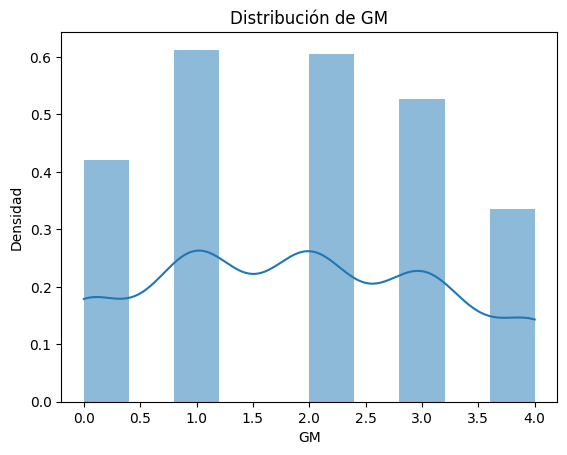

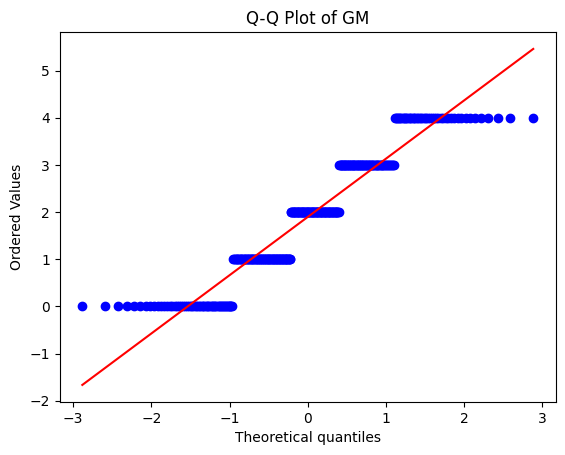

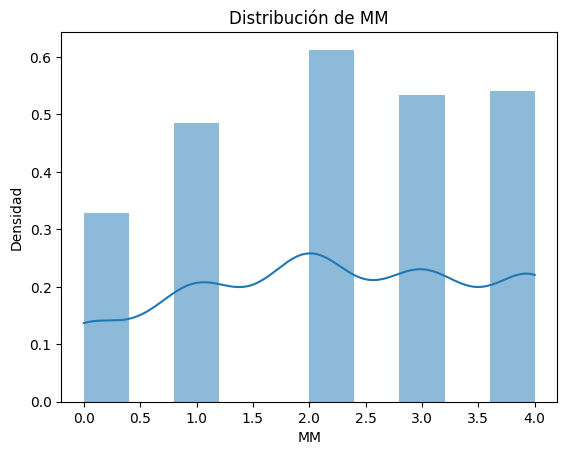

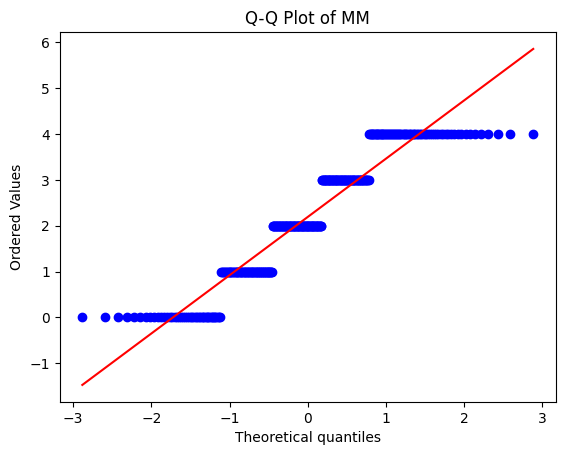

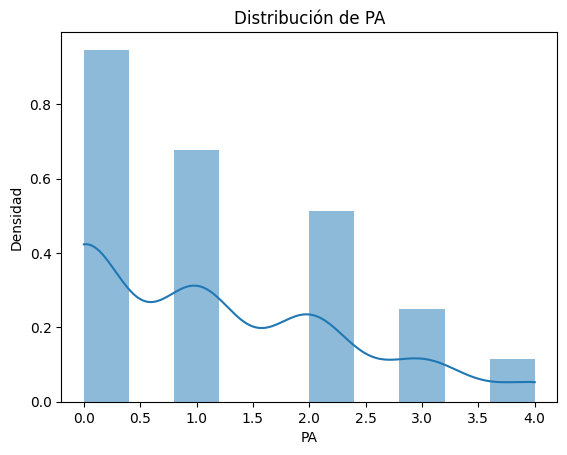

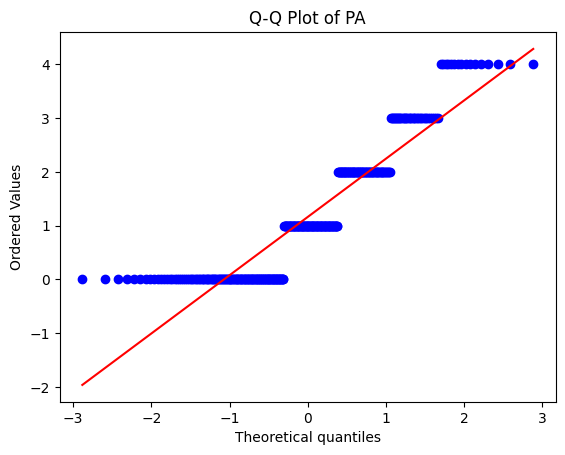

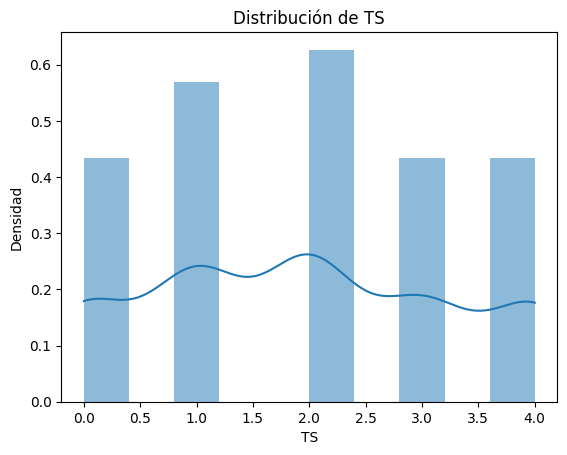

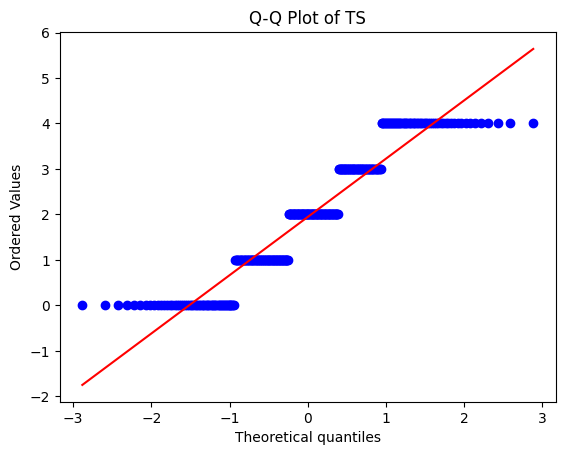

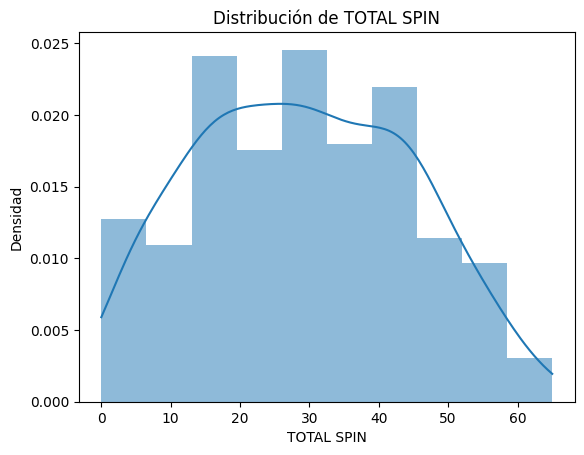

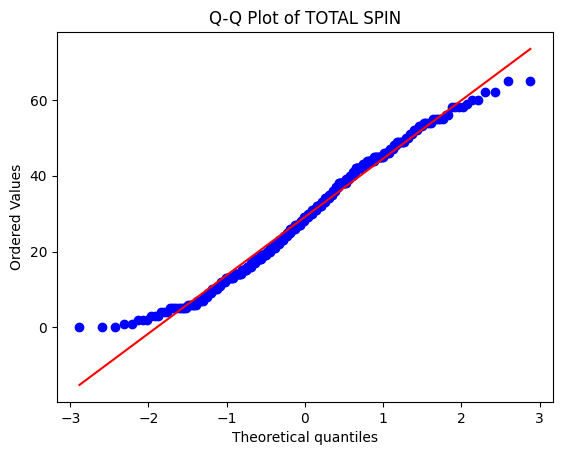

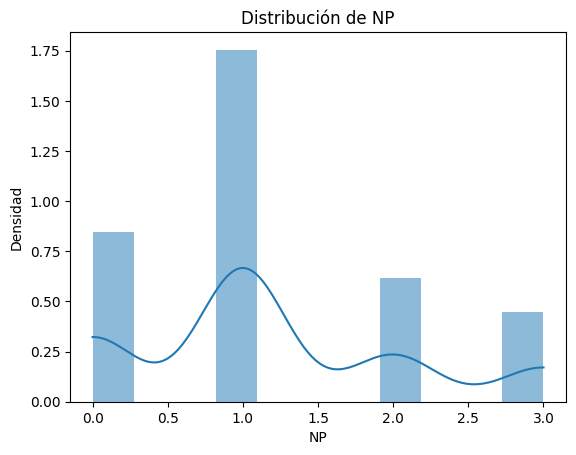

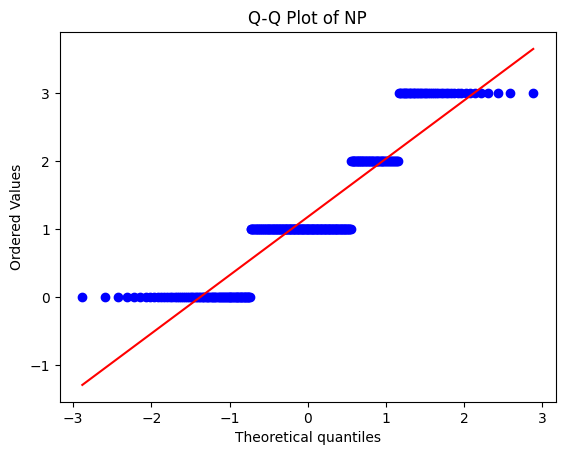

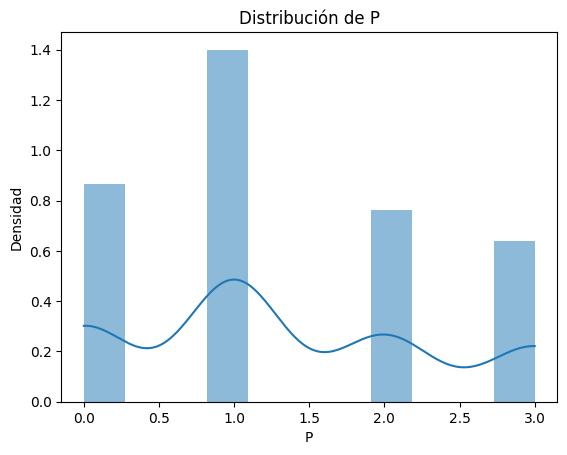

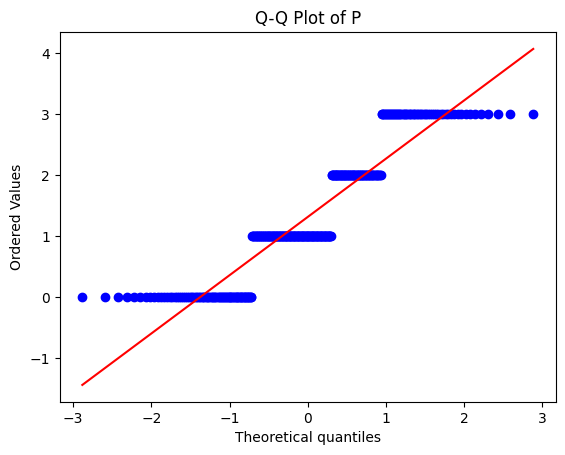

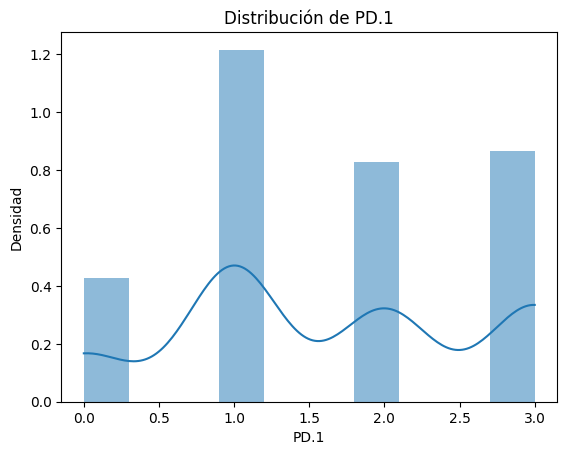

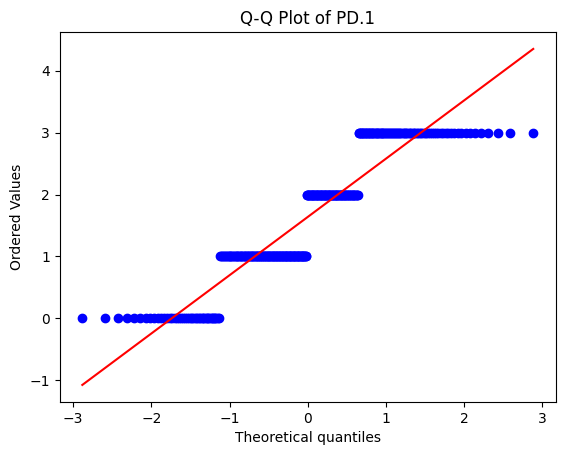

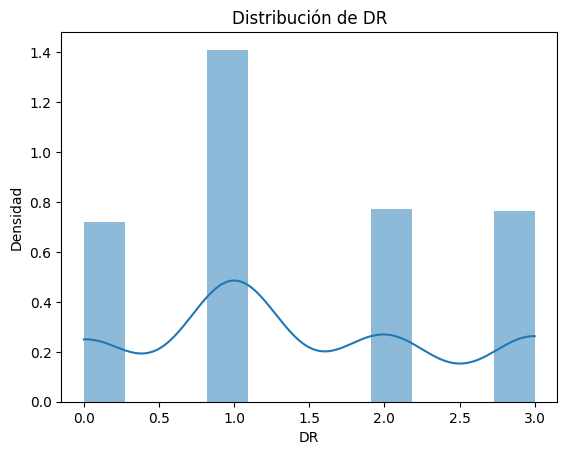

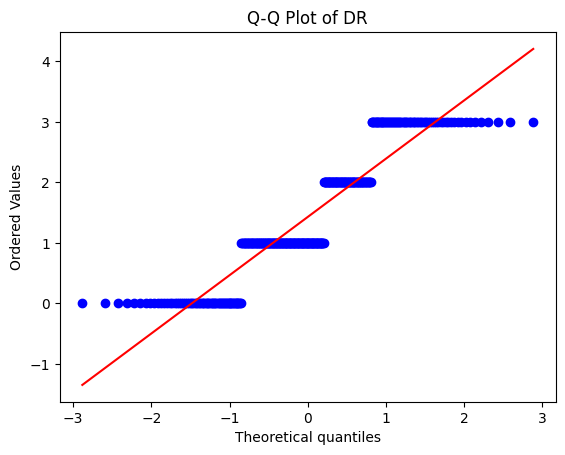

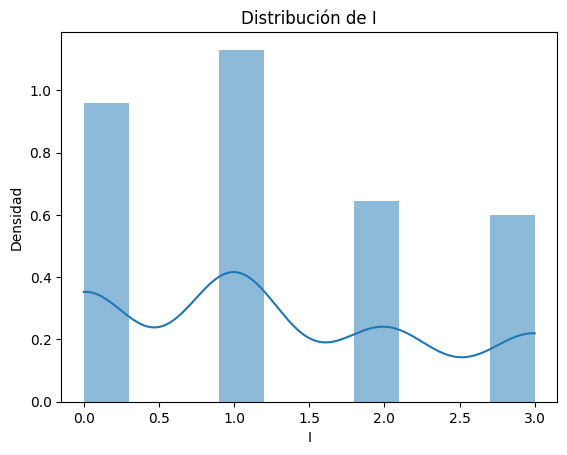

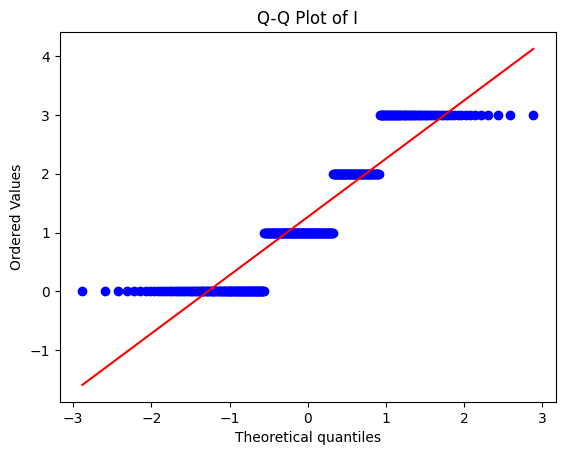

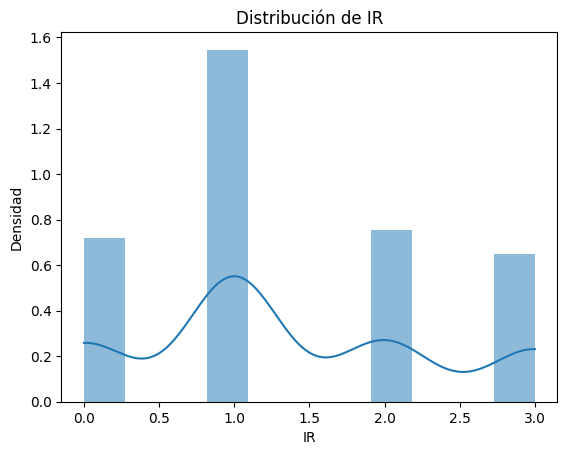

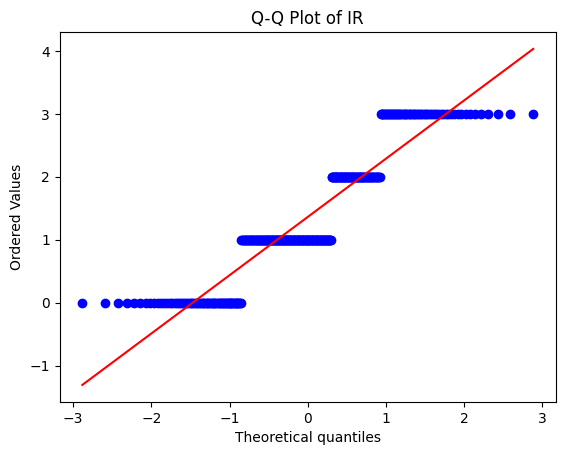

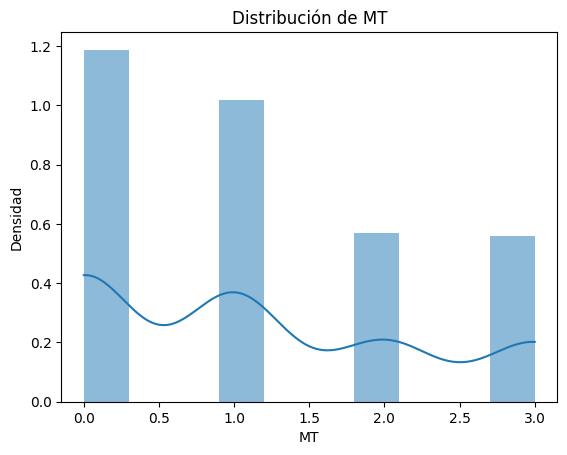

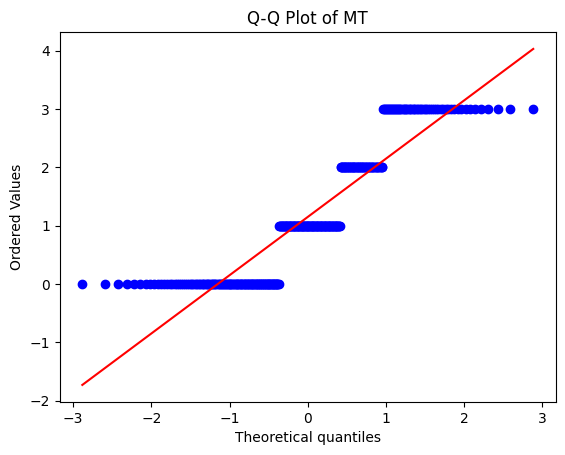

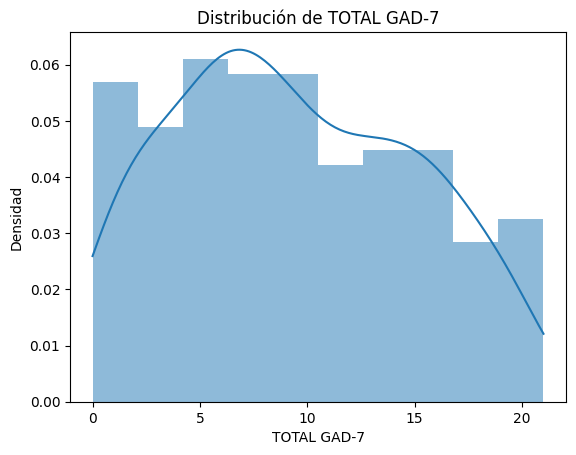

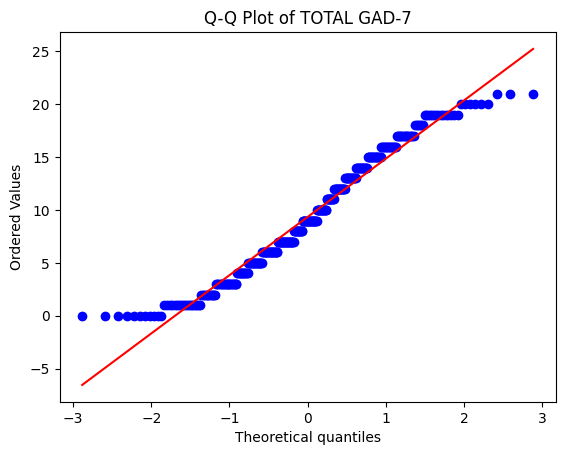

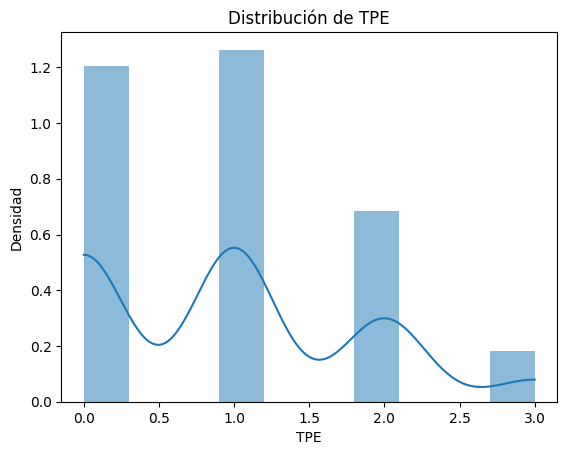

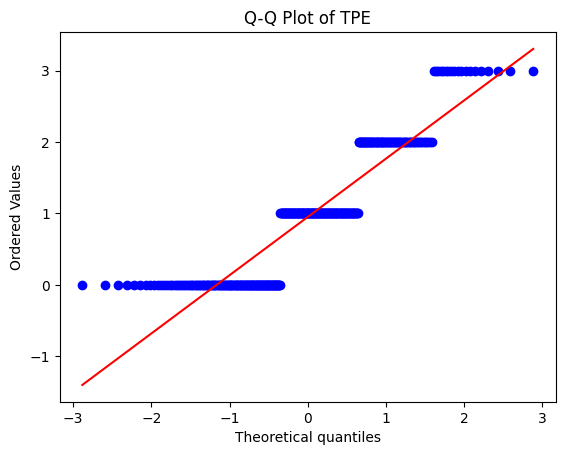

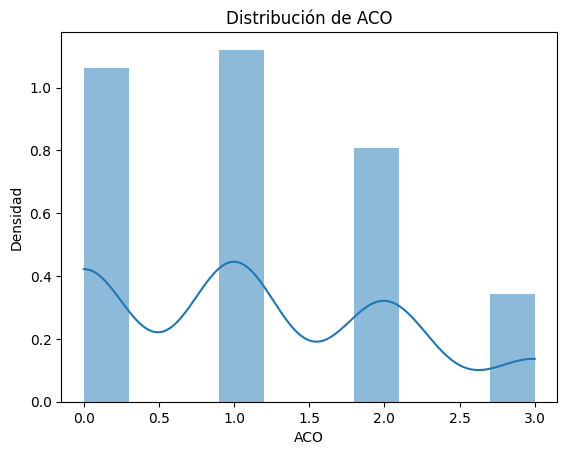

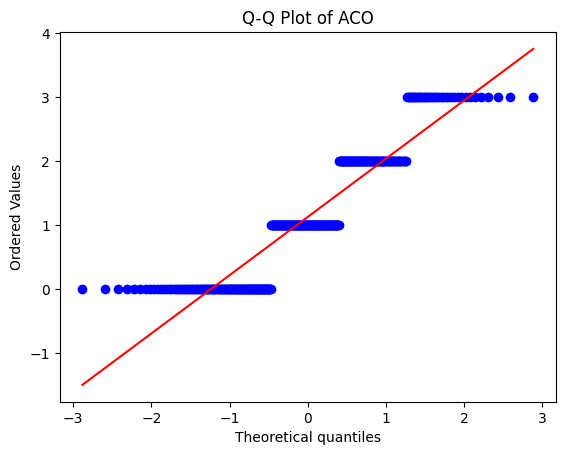

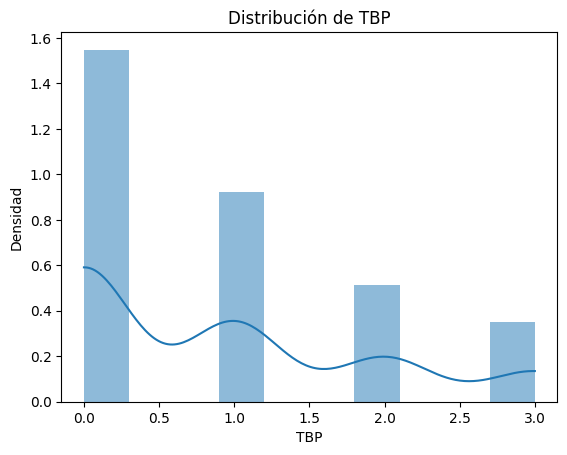

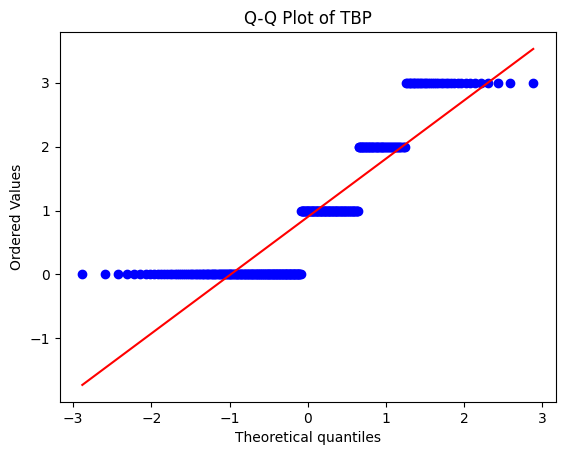

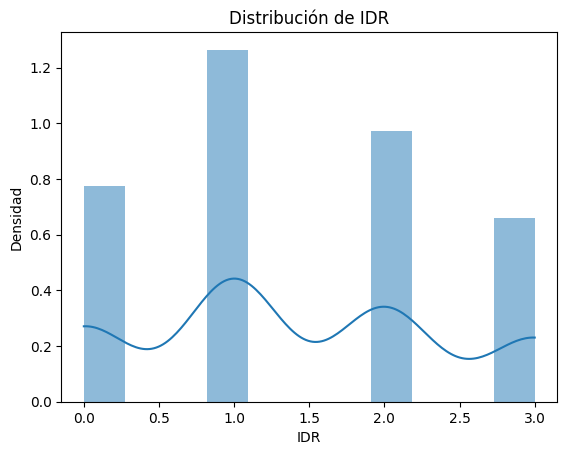

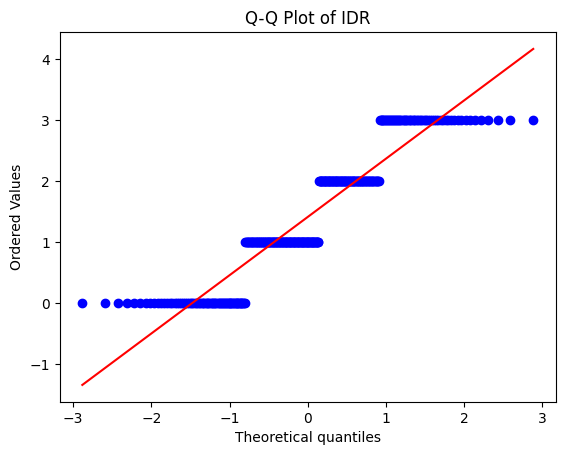

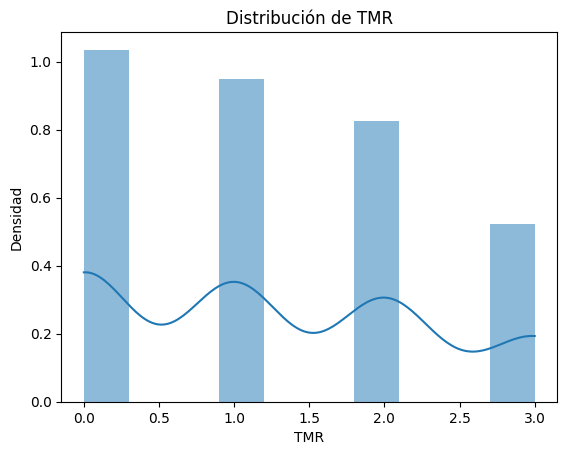

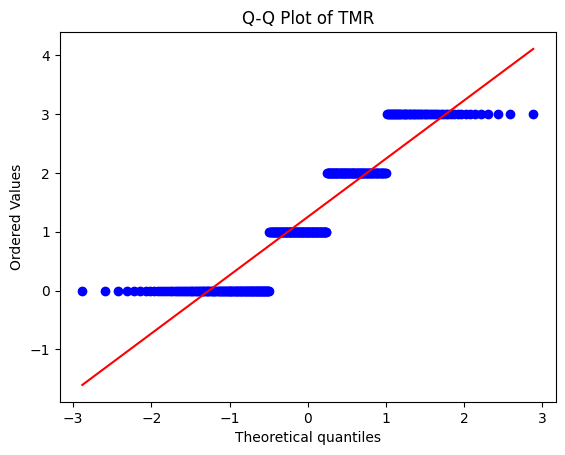

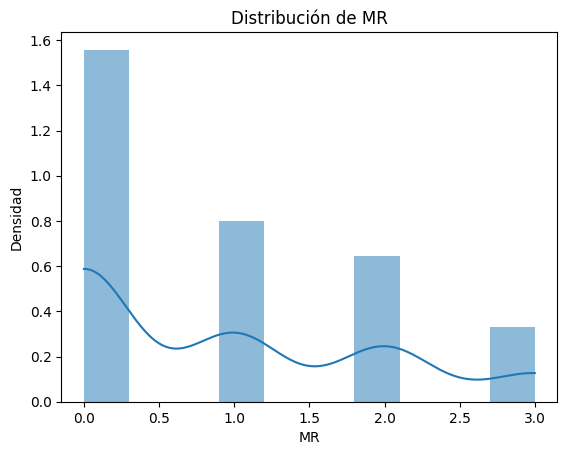

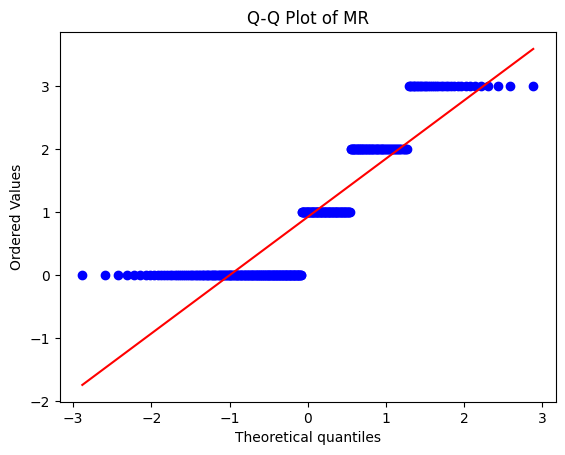

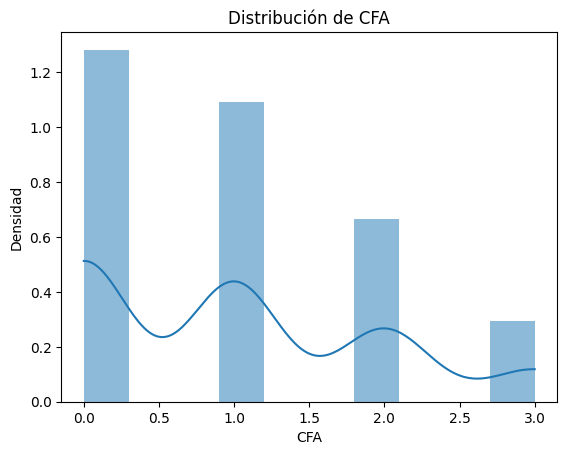

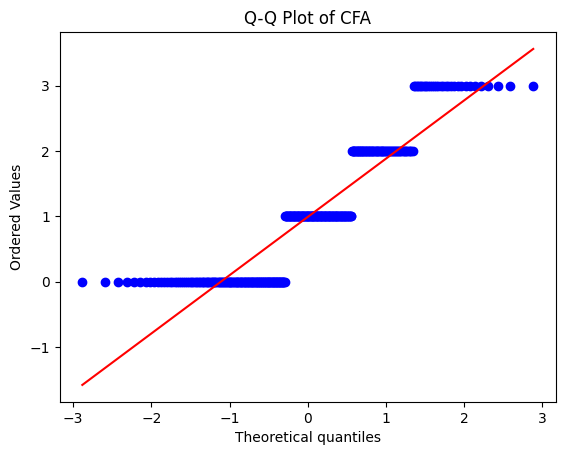

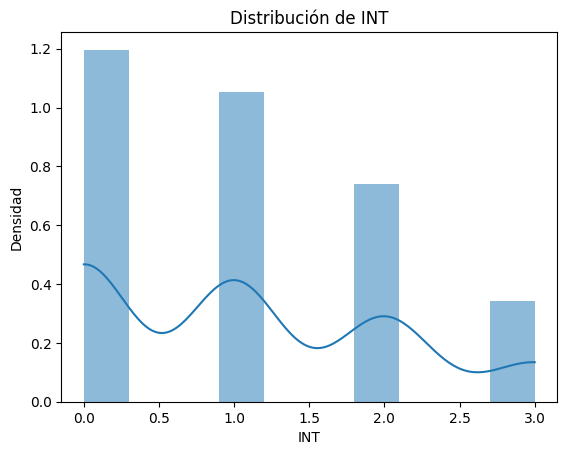

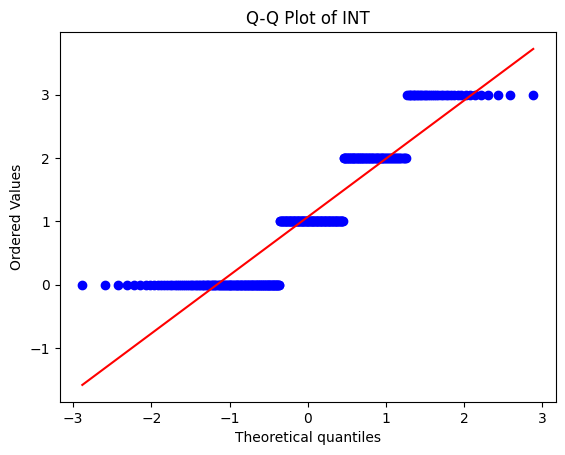

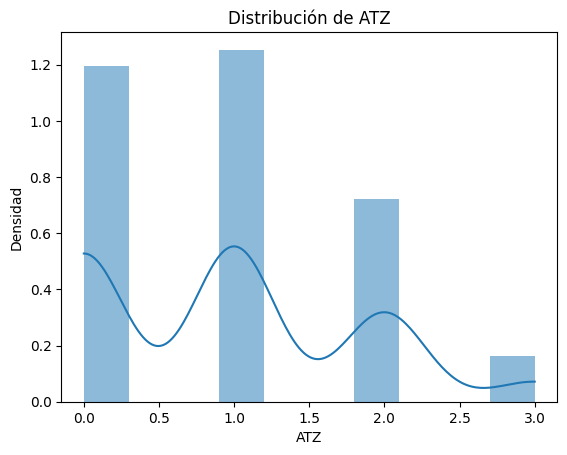

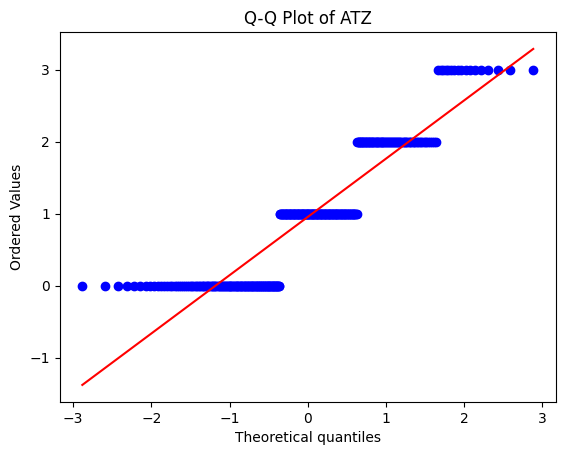

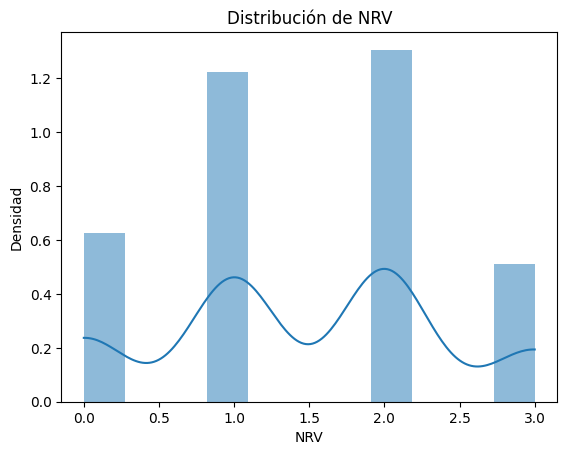

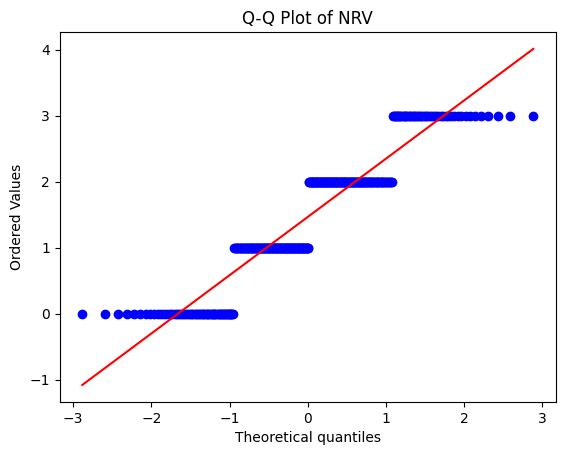

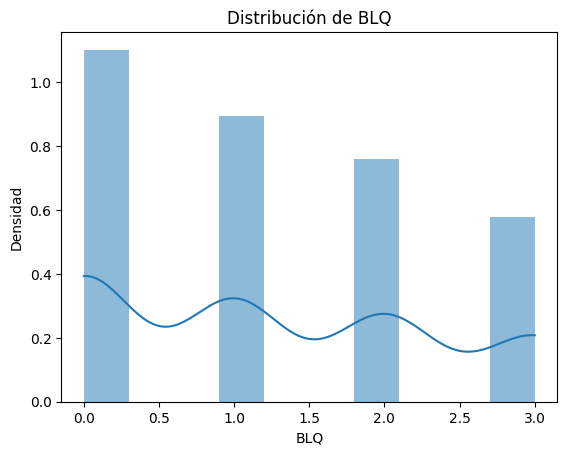

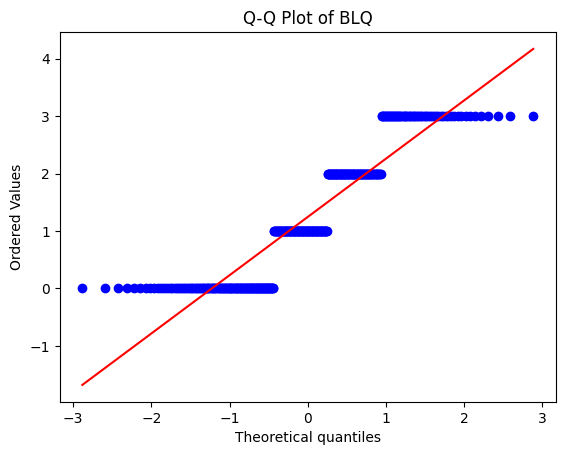

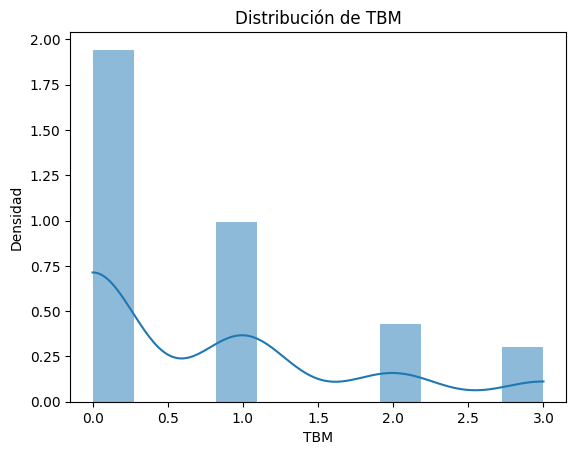

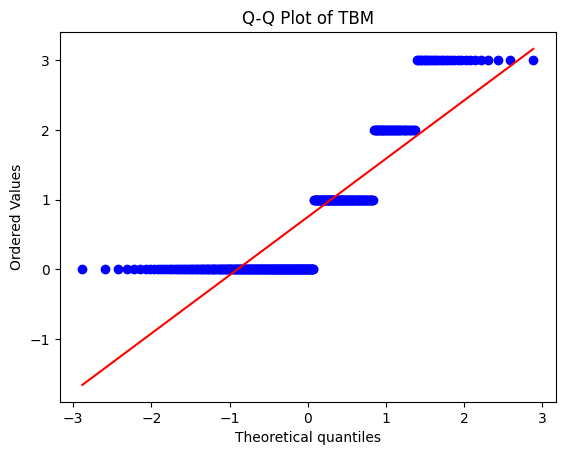

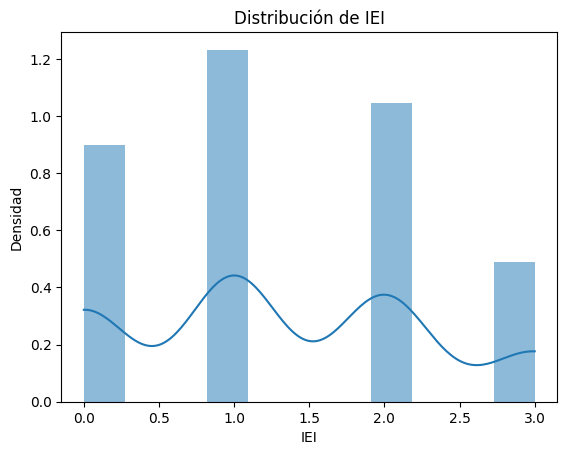

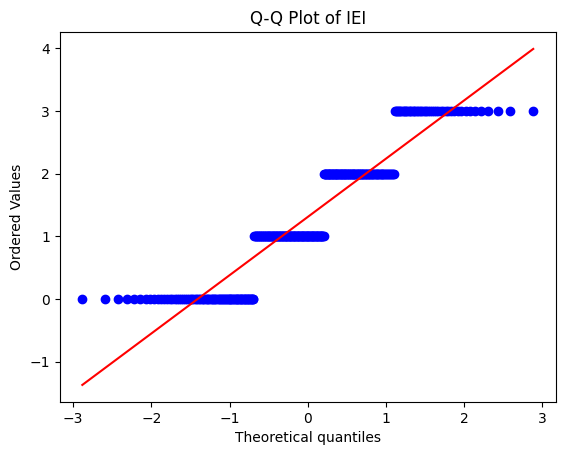

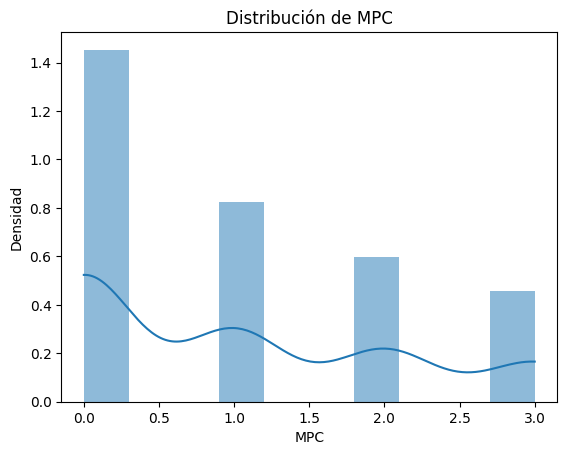

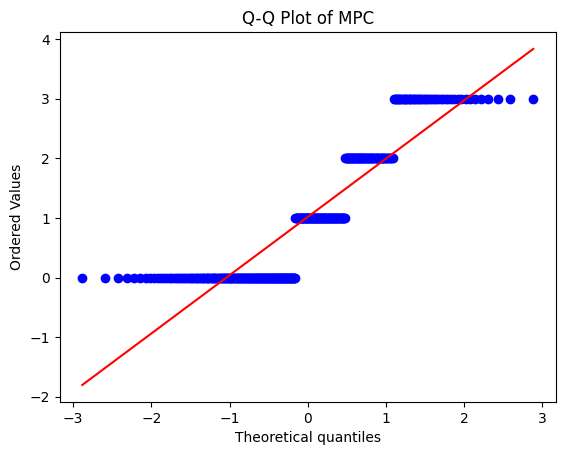

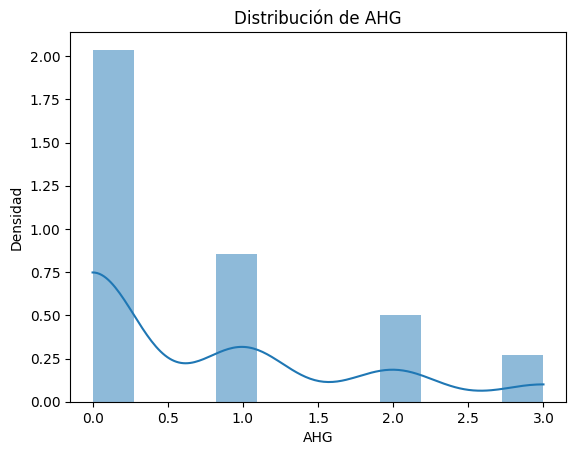

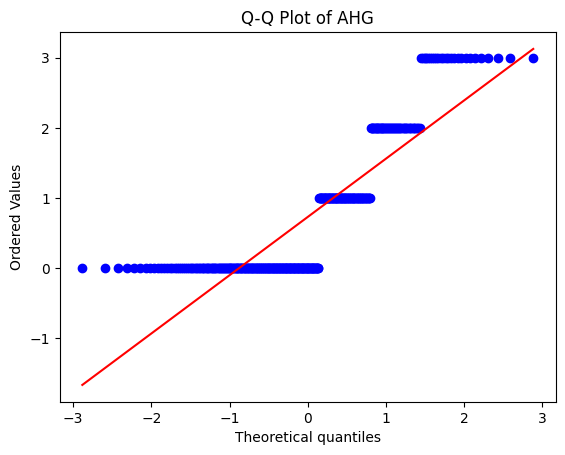

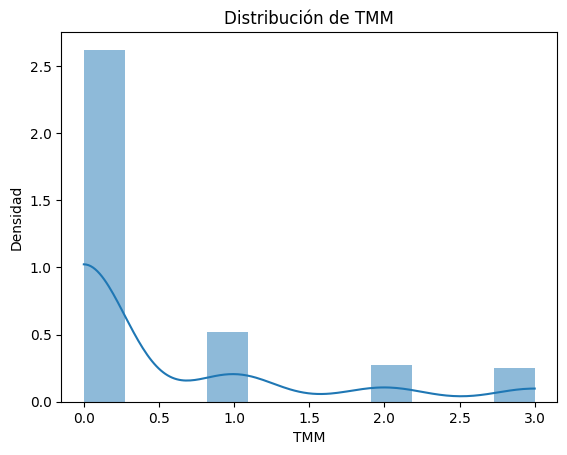

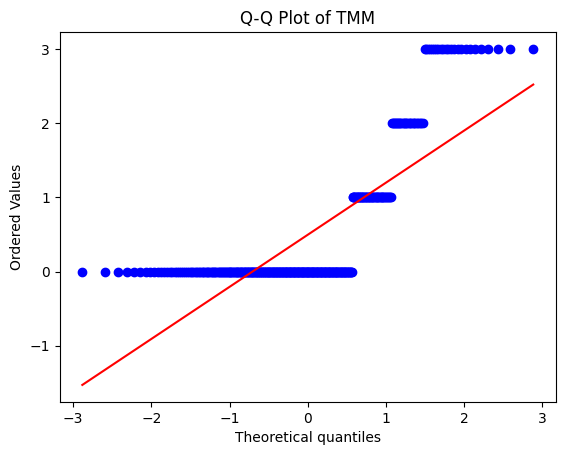

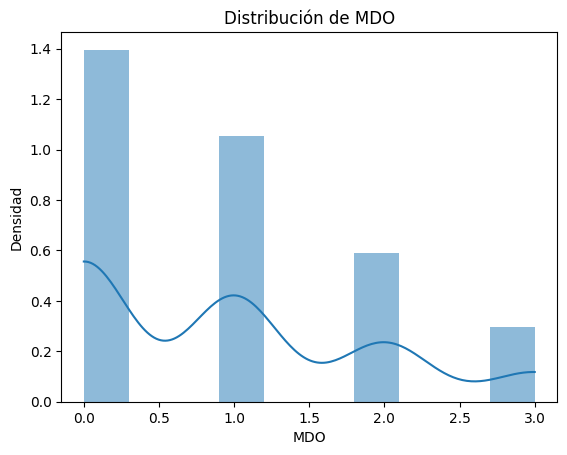

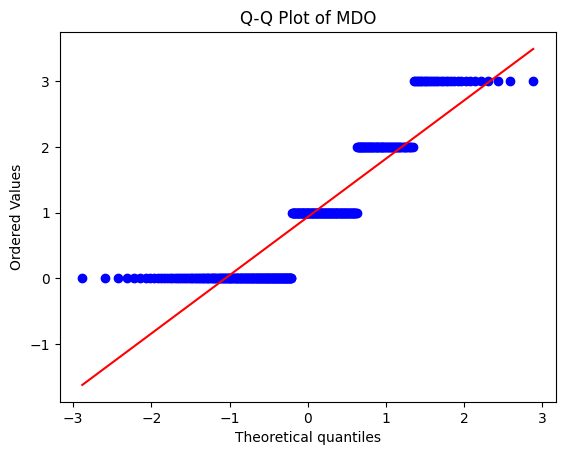

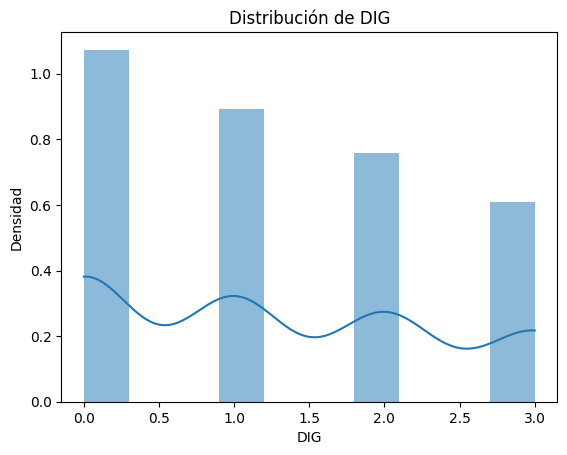

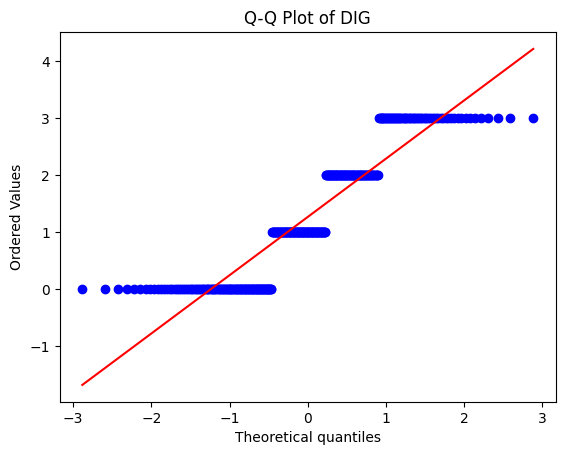

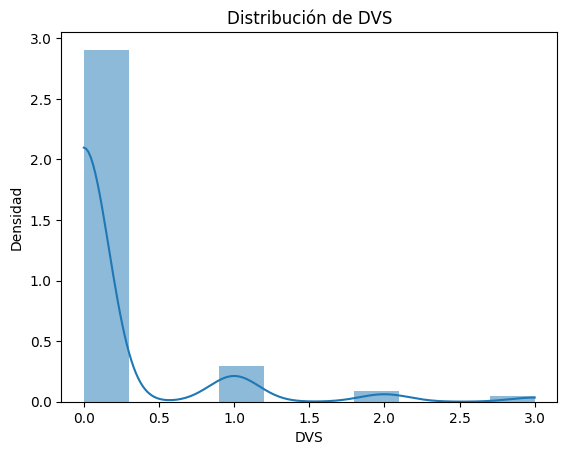

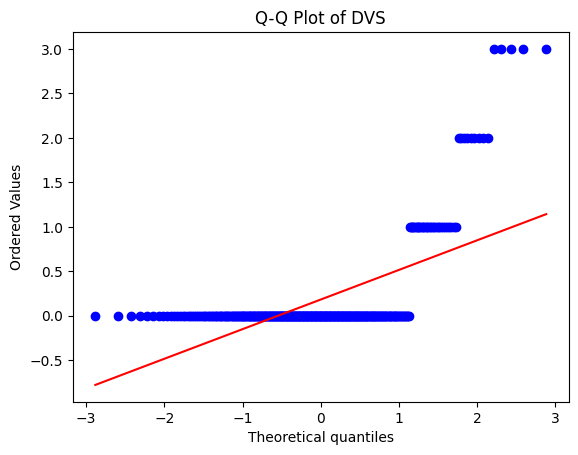

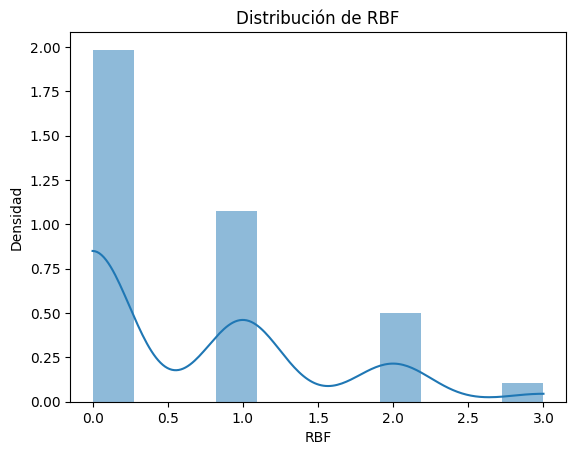

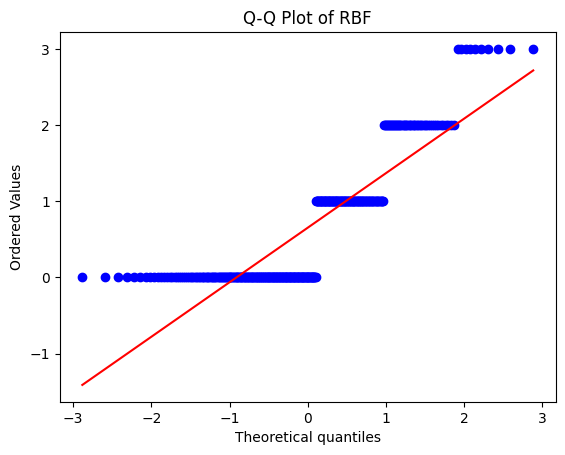

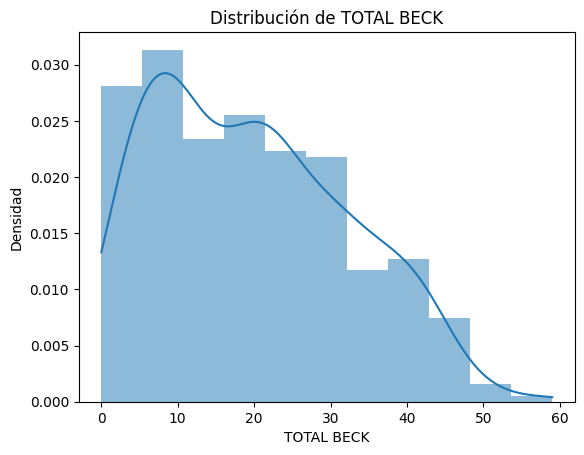

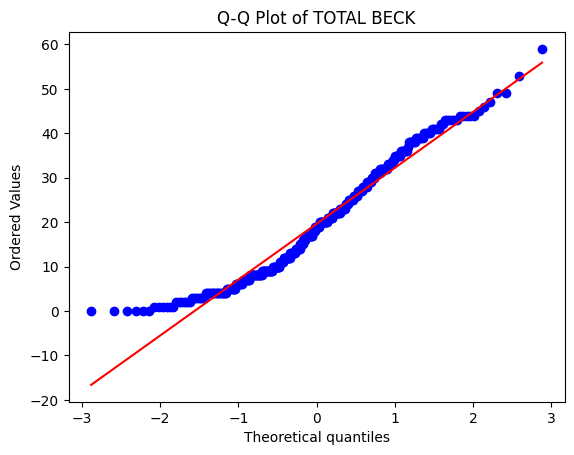

In [59]:
# Visualizaciones para todas las variables
variables = data.columns

# histogramas y qq para todas las variables
for var in variables:
    # Histograma
    sns.histplot(data[var], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribución de {var}')
    plt.ylabel('Densidad')
    plt.show()

    # QQ
    stats.probplot(data[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.show()


Al observar las variables es posible tener cierta problemática al tener tantas , sin embargo, debido a que muchas de las columnas son componentes de indicadores, se considera pertinente, en una primera aproximación, utilizar solo los totales para realziar los análisis, así como las variables sociodemográficas.

>**Exploración de todos las variables principales, distribución y QQ**

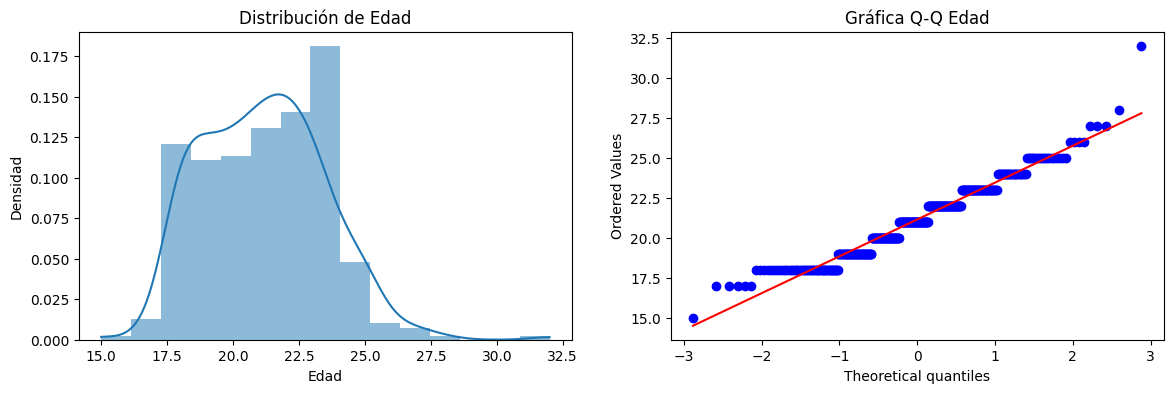

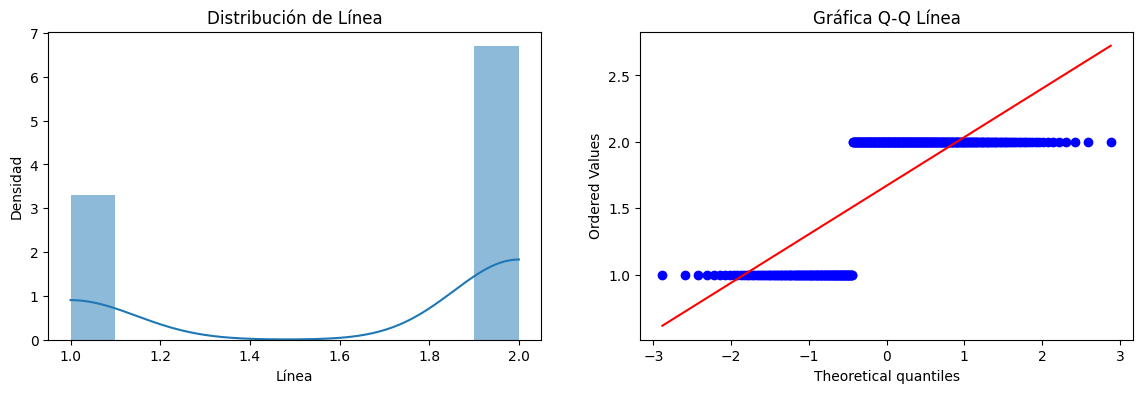

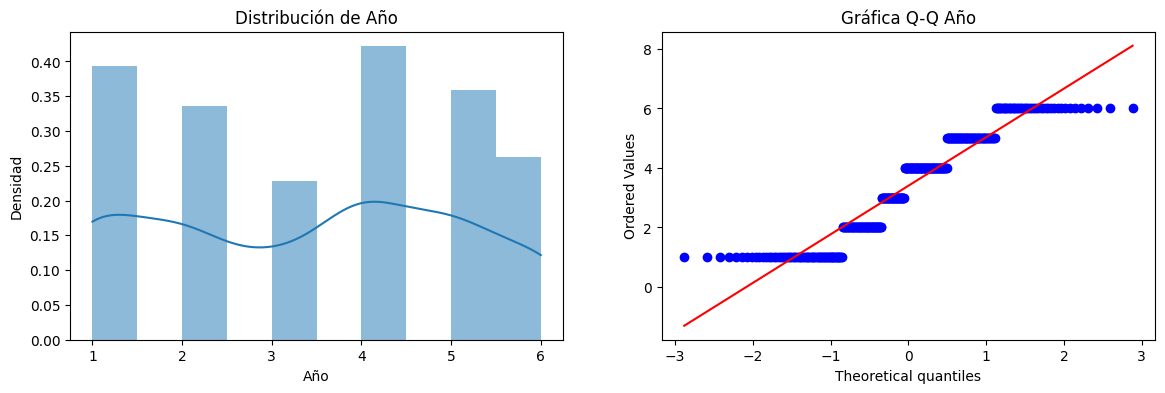

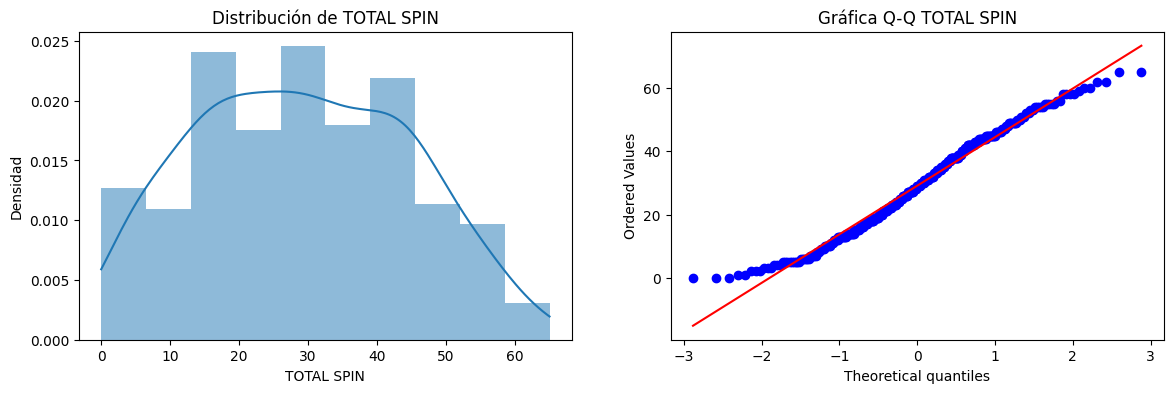

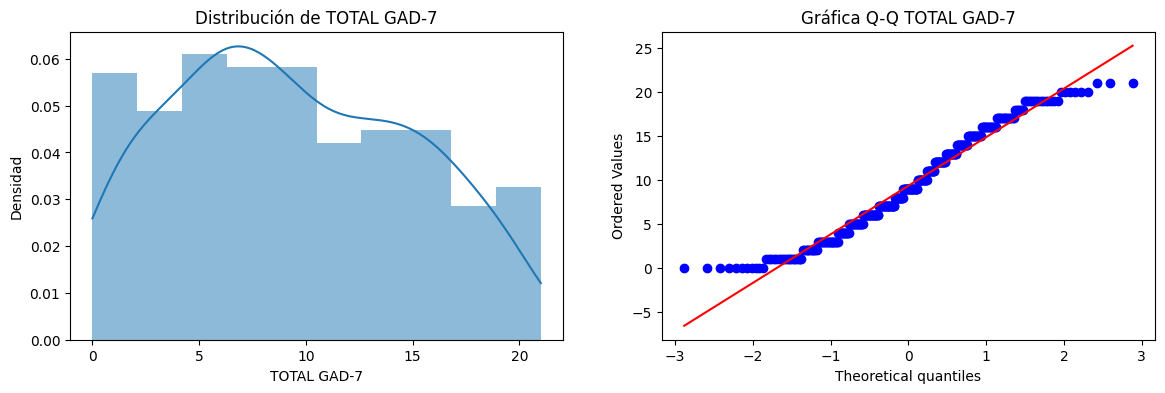

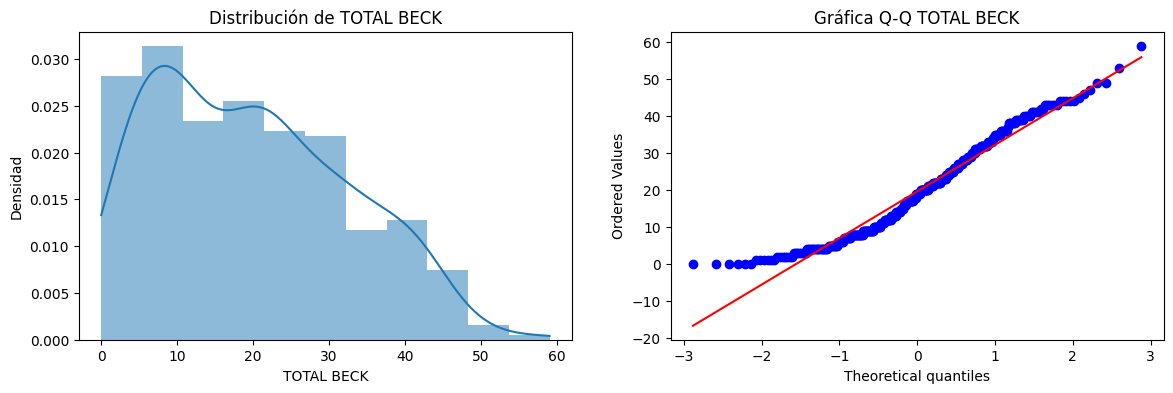

In [60]:
# funcion para crear plots focalizadas
def plot_variable_distribution(df, variable_name):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma
    sns.histplot(df[variable_name], kde=True, stat="density", linewidth=0, ax=ax[0])
    ax[0].set_title(f'Distribución de {variable_name}')
    ax[0].set_ylabel('Densidad')

    # qq
    stats.probplot(df[variable_name], dist="norm", plot=ax[1])
    ax[1].set_title(f'Gráfica Q-Q {variable_name}')

    plt.show()

# Edad
plot_variable_distribution(data, 'Edad')

# Línea
plot_variable_distribution(data, 'Línea')

# Año
plot_variable_distribution(data, 'Año')

# SPIN
plot_variable_distribution(data, 'TOTAL SPIN')

# GAD7
plot_variable_distribution(data, 'TOTAL GAD-7')

# Beck
plot_variable_distribution(data, 'TOTAL BECK')

**Edad**

*Histograma:* la distribución parece estar ligeramente sesgada hacia la izquierda, lo que indica que existe un grupo de participantes más jóvenes si se compara con la cantidad de personas mayores. Esta asimetría sugiere que los hallazgos serán más relevantes en el segmento de personas jovenes.

*Q-Q:* la desviación de la línea recta en el extremo inferior indica que las edades más jóvenes tienen más registros de lo esperado en una distribución normal, lo que es consistente con la asimetría que se muestra en el histograma.

**Línea**

*Histograma:* Dado que se sabe que esta variable es categoríca, ya que te dice si un estudiante estudió o no en línea su preparatoria, solamente se observa que existen más registros de personas sin cursar en línea.

*Q-Q:* La evaluación de normalidad no es aplicable ya que es una variable categórica.

**Año**

*Histograma*: de igual manera, esta es una variable categórica que sirve para saber en que año se encuentran los estudiantes de medicina.

*Q-Q:* La evaluación de normalidad no es aplicable ya que es una variable categórica.

**Total Spin**

*Histograma:* la distribución de las puntuaciones de "TOTAL SPIN" parecen ser simétricas cerca del promedio, lo que podría sugerir una distribución normal con un equilibrio de puntuaciones más bajas y más altas entre los estudiantes.

*Q-Q:* existen algunas desviaciones de la línea esperada, especialmente en las colas de la distribución, lo que indica que la distribución podría tener algunos valores extemos que no se ajustan a la distribución normal. Se considera no darles tratamiento hasta revisar directamente los valores.

**Total GAD-7**

*Histograma:* Las puntuaciones muestran una distribución unimodal con una ligera inclinación hacia la derecha, lo que indica una tendencia de los estudiantes a tener puntuaciones más bajas en el trastorno de ansiedad general.

*Q-Q:* las desviaciones de la línea, especialmente en la cola superior, sugieren la presencia de valores atípicos con puntuaciones más altas y una distribución que no es completamente normal.

**Total Beck**

Histograma: las puntuaciones parecen ser unimodal y ligeramente sesgadas hacia la derecha, lo que puede implicar que más estudiantes tienen puntuaciones  bajas en el Inventario de Ansiedad de Beck.

Q-Q: la gráfica muestra algunas desviaciones de la línea en la cola superior, pareciendo que existen algunos participantes con puntuaciones más altas de lo normal, lo que podría ser relevante para evaluar los niveles de ansiedad.

**Conclusiones generales:**

Las puntuaciones de los indicadores de ansiedad muestran algunas desviaciones de la normalidad, particularmente en sus colas, lo que sugiere que si bien muchos estudiantes tienen puntuaciones moderadas, hay grupos notables con puntuaciones muy bajas o altas, lo que podría ser significativo para comprender el impacto en la salud mental de estos valores atípicos.

Los conocimientos de estas distribuciones no solo informan la evaluación psicológica sino también pueden servir de manera preventiva para realizar intervenciones, ya que resaltan la extensión y los extremos de las respuestas de salud mental dentro de la población estudiantil.

**B. Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:**

De las opciones enlistadas se hará un análisis usando correlaciones y agruoaciones con K medias.

>**Análisis de correlación**

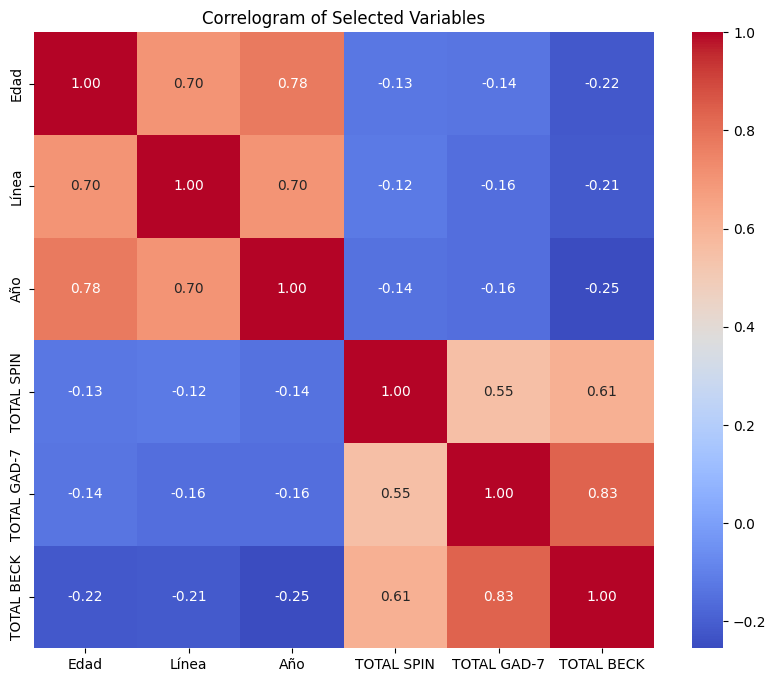

In [61]:
# filtrado variables de interés
variables_of_interest = ['Edad', 'Línea', 'Año', 'TOTAL SPIN', 'TOTAL GAD-7', 'TOTAL BECK']

# Creación correlograma
correlogram_data = data[variables_of_interest].corr()

# grafica del correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlogram_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram of Selected Variables')
plt.show()

El correlograma proporcionado muestra los coeficientes de correlación entre las variables de interés definidas, aquí se enlistan los hallazgos más relevantes:

1. **Correlación entre puntuaciones de las escalas de ansiedad**:
    - TOTAL BECK tiene una correlación positiva muy fuerte con TOTAL GAD-7 (`0.83`), lo que indica que estas dos medidas de ansiedad tienen una relación fuerte. Esto puede implicar que los estudiantes que obtienen una puntuación alta en una de estas mediciones, también obtengan una puntuación alta en alguna otra.
    - TOTAL SPIN también muestra una correlación positiva significativa tanto con TOTAL BECK (`0.61`) como con TOTAL GAD-7 (`0.55`), aunque estas relaciones son menos intensas en comparación con la correlación entre TOTAL BECK y TOTAL GAD-7. Esto sigue indicando que existe una relación en la que puntuaciones más altas en fobia social se asocian con niveles más altos de ansiedad según las escalas de Beck y GAD-7.

2. **Correlación Edad**:
    - Los tres indicadores tienen una correlación negativa con Edad. El caso de "TOTAL BECK" presenta la relación más negativa (`-0.25`). Esto podría implicar que los estudiantes más grandes reportaron niveles más bajos de ansiedad, efecto que puede ser originado por no tener que cursar la preparatoria en línea.

3. **Correlación Línea, Año y totales de medición**:
    - Existen correlaciones negativas débiles entre Línea y Año con las puntuaciones de las escalas, lo que sugiere que estas variables tienen una ligera relación inversa con los niveles de ansiedad y estrés reportados. Sin embargo, Se considera que las correlaciones son débiles y podrían ser significativas en análisis posteriores.

4. **Implicaciones para el análisis**:
    - Las fuertes intercorrelaciones entre las medidas indican que estas variables miden aspectos relacionados pero distintos de la ansiedad y el estrés. Esto tiene implicaciones para cualquier modelado o análisis, ya que es posible que estas variables deban tratarse con consideraciones de multicolinealidad.
    - Las correlaciones negativas con "Edad" sugieren que la edad podría ser un factor importante en el análisis e interpretación de los niveles de ansiedad y estrés.

Lo descrito anteriormente puede ayudar mucho al momento de preparar los modelos de regresión, donde las intercorrelaciones entre variables serán un factor importante a considerar.

>**Clusters y PCA**

Primero se procederá a transformar las variables con StandardScaler.

In [62]:
# Segmentación de la base de datos
data_linea_1 = data[data['Línea'] == 1][['Edad', 'Año', 'TOTAL SPIN', 'TOTAL GAD-7', 'TOTAL BECK']]
data_linea_2 = data[data['Línea'] == 2][['Edad', 'Año', 'TOTAL SPIN', 'TOTAL GAD-7', 'TOTAL BECK']]

# Estandarización para clusters y PCA
scaler = StandardScaler()
data_linea_1_scaled = scaler.fit_transform(data_linea_1)
data_linea_1_scaled_df = pd.DataFrame(data_linea_1_scaled, columns=['Edad', 'Año', 'TOTAL SPIN', 'TOTAL GAD-7', 'TOTAL BECK'])

data_linea_2_scaled = scaler.fit_transform(data_linea_2)
data_linea_2_scaled_df = pd.DataFrame(data_linea_2_scaled, columns=['Edad', 'Año', 'TOTAL SPIN', 'TOTAL GAD-7', 'TOTAL BECK'])

Una vez trasformadas, se decidió realizar los clusters por cada grupo, los que tomaron la prepa en línea y los que no. Primero se muestran los resultados para los que cursaron la prepa en línea (grupo 1)

>**Clusters y PCA para Línea 1**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

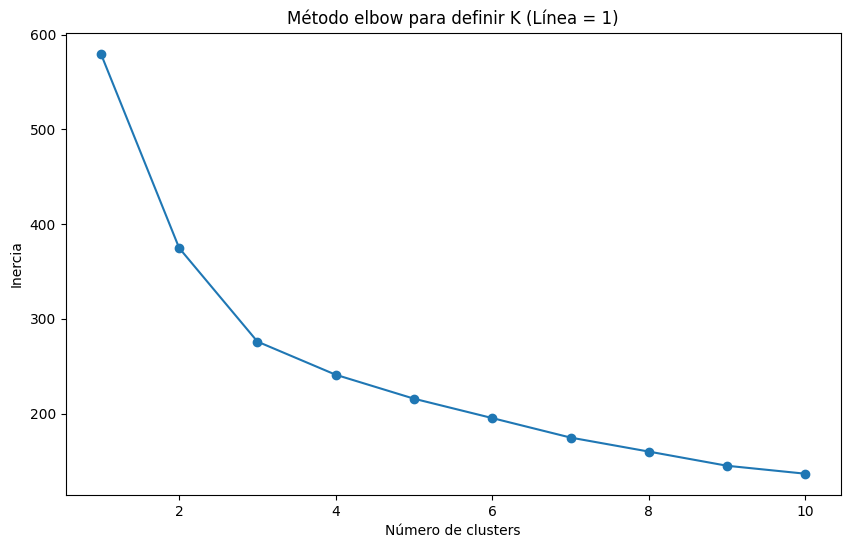

In [63]:
# Inercia para kmeans
inertias_linea_1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_linea_1_scaled_df)
    inertias_linea_1.append(kmeans.inertia_)

# grafica Elbow!
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias_linea_1, marker='o')
plt.title('Método elbow para definir K (Línea = 1)')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


Con base en la gráfica que se puede observar se puede decir lo siguiente:

1.   Existe una disminución en la pendiente de la curva cuando se pasa de 1 cluster a 2, lo que indica que se existe una ganancia importante en la homogeneidad de los grupos.
2.   El punto de inflexión de la gráfica existe cuando K es igual a 4, por lo que se considera que es el punto óptimo de clusters.

Despues, se realiza una reducción con PCA para poder gráficar de manera correcta los clusters.

Varianza explicada por componente:
 [0.4861467  0.30441336 0.11250029 0.06139706 0.03554258]

Varianza explicada acumulada:
 [0.4861467  0.79056006 0.90306036 0.96445742 1.        ]


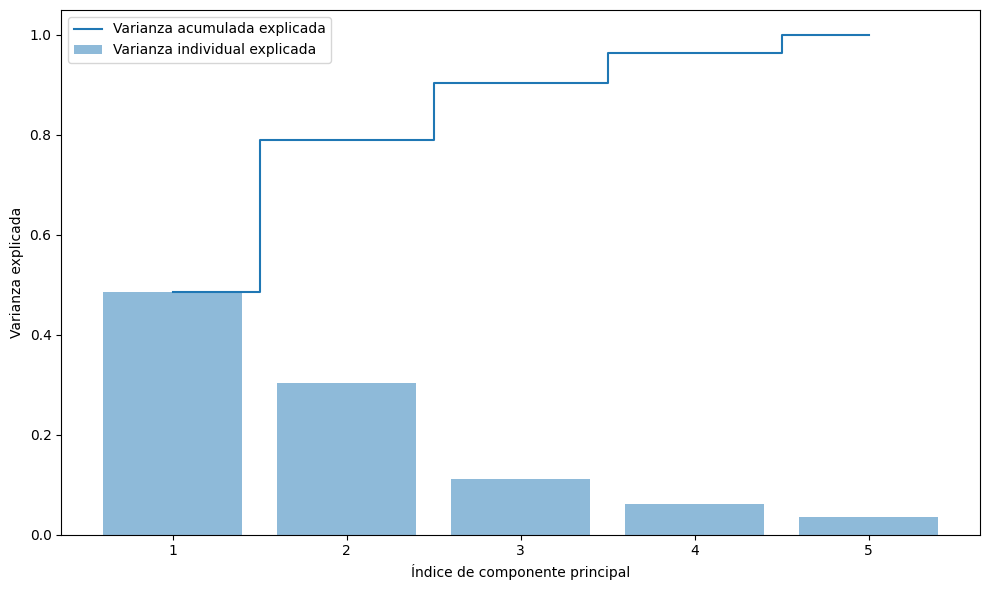

In [64]:
# PCA
pca_full = PCA()
pca_full.fit(data_linea_1_scaled_df)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Con base en la gráfica de la varianza explicada por los componentes, se decidió usar dos, ya que explican casi el 80% de la varianza y con base en esos, se realiza la representación gráfica de los clusters:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


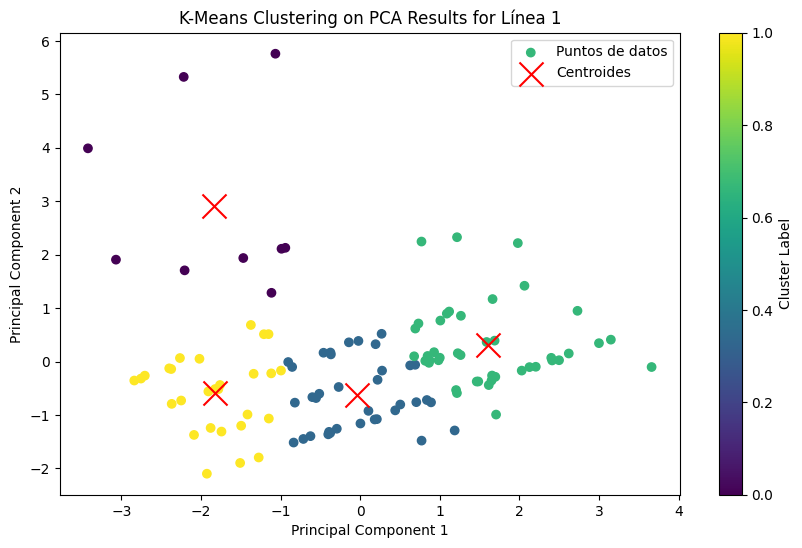

In [65]:
# Aplicar PCA para reducir a 2 componentes
pca_linea_1 = PCA(n_components=2)
data_linea_1_pca = pca_linea_1.fit_transform(data_linea_1_scaled_df)

# K means con 4 clusters para linea 1
kmeans_linea_1 = KMeans(n_clusters=4, random_state=42)
clusters_linea_1 = kmeans_linea_1.fit_predict(data_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_linea_1_pca[:, 0], data_linea_1_pca[:, 1], c=clusters_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_linea_1.cluster_centers_[:, 0], kmeans_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


La gráfica que se puede observar es la representación gráfica de los clusters generados por el K-Means aplicado a los datos que se redujeron usando PCA a dos componentes principales.

Se pueden observar los clusters generados con un color diferente y estos están centrados alrededor de una X roja que es el centroide, con base en lo que se observa se puede decir que K-means logró identificar con exito grupos separados dentro de los datos.


>**Clusters y PCA para Línea 2**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

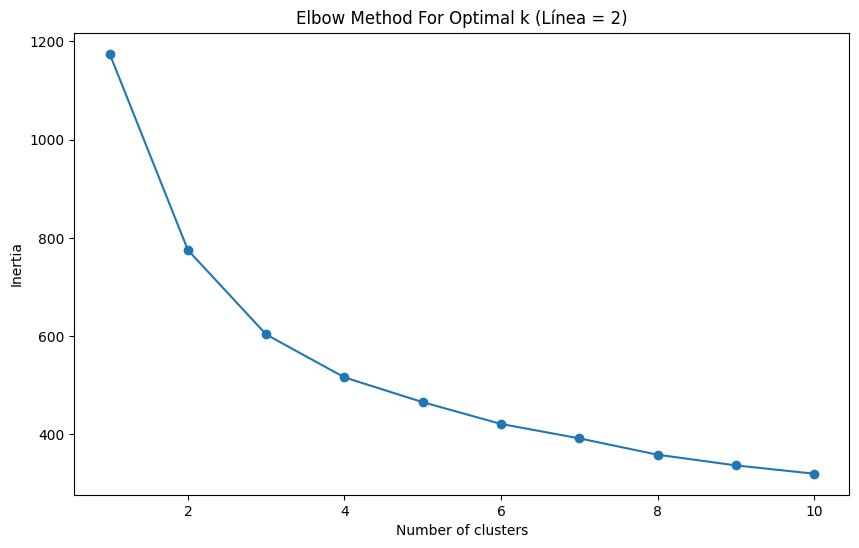

In [66]:
# Inercia
inertias_linea_2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_linea_2_scaled_df)
    inertias_linea_2.append(kmeans.inertia_)

# grafica elbow para linea 2
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias_linea_2, marker='o')
plt.title('Elbow Method For Optimal k (Línea = 2)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Con base en la gráfica que se puede observar se puede decir lo siguiente:

1.   Existe una disminución en la pendiente de la curva cuando se pasa de 1 cluster a 2, lo que indica que se existe una ganancia importante en la homogeneidad de los grupos.
2.   El punto de inflexión de la gráfica existe cuando K es igual a 3, por lo que se considera que es el punto óptimo de clusters.

Despues, se realiza una reducción con PCA para poder gráficar de manera correcta los clusters.

Varianza explicada por componente:
 [0.47942697 0.30174781 0.09741709 0.09185048 0.02955766]

Varianza explicada acumulada:
 [0.47942697 0.78117478 0.87859186 0.97044234 1.        ]


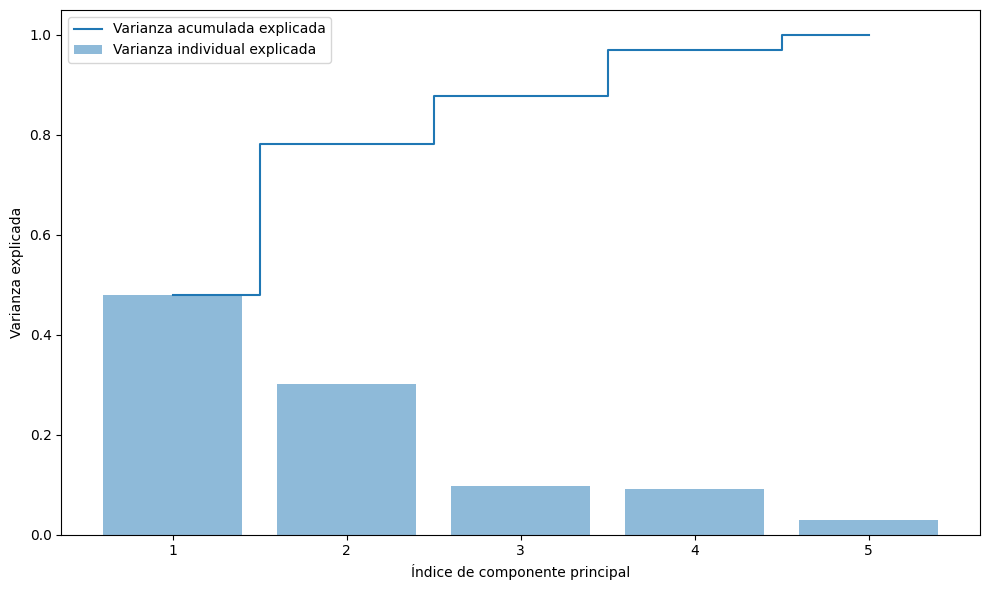

In [67]:
# PCA
pca_full = PCA()
pca_full.fit(data_linea_2_scaled_df)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Con base en la gráfica de la varianza explicada por los componentes, se decidió usar dos, ya que explican casi el 80% de la varianza y con base en esos, se realiza la representación gráfica de los clusters:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


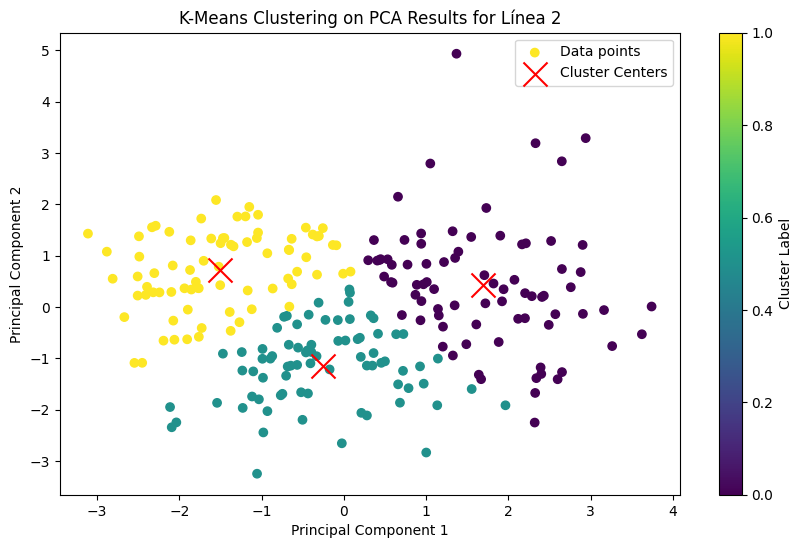

In [68]:
# PCA para reducir a 2 componentes para linea 2
pca_linea_2 = PCA(n_components=2)
data_linea_2_pca = pca_linea_2.fit_transform(data_linea_2_scaled_df)

# Kmeans con 3 clusters
kmeans_linea_2 = KMeans(n_clusters=3, random_state=42)
clusters_linea_2 = kmeans_linea_2.fit_predict(data_linea_2_pca)

# Graf PCA y clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_linea_2_pca[:, 0], data_linea_2_pca[:, 1], c=clusters_linea_2, cmap='viridis', marker='o', label='Data points')
plt.scatter(kmeans_linea_2.cluster_centers_[:, 0], kmeans_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Cluster Centers')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


La gráfica que se puede observar es la representación gráfica de los clusters generados por el K-Means aplicado a los datos que se redujeron usando PCA a dos componentes principales.

Se pueden observar los clusters generados con un color diferente y estos están centrados alrededor de una X roja que es el centroide, con base en lo que se observa se puede decir que K-means logró identificar con exito grupos separados dentro de los datos.

>**Asginación de clusters a la base original**

A continuación, se une la base original con los clusters encontrados, se hace para poder realizar análisis detallados de cada línea y cada cluster, como si fuese un análisis sectorial.

In [53]:
#columna nueva para asignar los clusters a la base original
data['Cluster'] = np.nan

# Etiquetas de los clusters Línea 1
data.loc[data_linea_1_scaled_df.index, 'Cluster'] = clusters_linea_1

# Etiquetas de los clusters Línea 2
data.loc[data_linea_2_scaled_df.index, 'Cluster'] = clusters_linea_2


Se revisa que las etiquetas sean asignadas

In [70]:
# muestra la nueva base
print(data.head())

# guardar en excel.
output_file_path = 'clustered_data.xlsx'  # Replace with your desired path
data.to_excel(output_file_path, index=False)

   ID  CI  Edad  Año  Línea  MA  SON  ES  PD  CRI  ...  TBM  IEI  MPC  AHG  \
0   1   1    21    5      2   1    0   0   0    1  ...    0    0    0    0   
1   2   1    25    5      2   0    0   1   1    2  ...    0    1    0    0   
2   3   1    19    1      1   3    4   4   4    4  ...    1    3    0    1   
3   4   1    18    1      1   2    2   2   2    1  ...    0    0    1    1   
4   5   1    19    2      1   1    0   2   2    1  ...    3    2    1    0   

   TMM  MDO  DIG  DVS  RBF  TOTAL BECK  
0    2    0    0    0    0          10  
1    0    0    1    0    0          10  
2    1    2    3    1    2          41  
3    2    0    0    0    0           9  
4    0    0    2    0    0          26  

[5 rows x 52 columns]


**C. Incluir conclusiones de la fase de "Preparación de los datos" en el contexto de la metodología CRISP-ML.**